In [86]:
# import geopandas as gpd
# import geopy
# from shapely.geometry import Point
# from geopy.geocoders import Nominatim

import pandas as pd
import numpy as np
import mpu
import seaborn as sns

pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)
pd.set_option('display.width', 10000)


In [68]:
df = pd.read_excel('atm_bank_misr.xlsx')
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4263 entries, 0 to 4262
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           4263 non-null   int64  
 1   governerate  4263 non-null   object 
 2   region       4263 non-null   object 
 3   Address      4263 non-null   object 
 4   Lat          4263 non-null   float64
 5   Long         4263 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 200.0+ KB


In [69]:
df.head()

ID governerate            region                                        Address        Lat       Long
0   1   Al Fayyum  Markaz Al-Fayyum                  Alfayoum Beghous Alhoriea St.  29.304412  30.853546
1   2   Al Fayyum  Markaz Al-Fayyum                              Fayoum University  29.319696  30.835641
2   3   Al Fayyum  Markaz Al-Fayyum                            Fayoum AlHoriea St.  29.308199  30.842229
3   4   Al Fayyum   Markaz Sinnuris                               Sanoras - Fayoum  29.408575  30.865073
4   5   Al Fayyum       Markaz Itsa  194 Abo Bakr AlSiddiq St.- Atsa City - Fayoum  29.236966  30.790194

In [70]:
df.iloc[[55,132]]

ID  governerate             region                     Address        Lat      Long
55    56  Al Buhayrah  Markaz Abu Hummus  The local unit - Abo Homos  31.100602  30.31555
132  133  Al Buhayrah  Markaz Abu Hummus  The local unit - Abo Homos  31.100602  30.31555

In [71]:
lat_longs = np.array(df[['Lat','Long']])#

In [72]:
df

ID       governerate                                             region                                            Address        Lat       Long
0        1         Al Fayyum                                   Markaz Al-Fayyum                      Alfayoum Beghous Alhoriea St.  29.304412  30.853546
1        2         Al Fayyum                                   Markaz Al-Fayyum                                  Fayoum University  29.319696  30.835641
2        3         Al Fayyum                                   Markaz Al-Fayyum                                Fayoum AlHoriea St.  29.308199  30.842229
3        4         Al Fayyum                                    Markaz Sinnuris                                   Sanoras - Fayoum  29.408575  30.865073
4        5         Al Fayyum                                        Markaz Itsa      194 Abo Bakr AlSiddiq St.- Atsa City - Fayoum  29.236966  30.790194
5        6         Al Fayyum                                   Markaz Al-Fayyum                   AlFayoum 45 AlHorreya St. Fayoum  29.307723  30.846140
6        7         Al Fayyum                                   Markaz Al-Fayyum     Gamal Abd AlNasser St. - AlMasalla Sq.- Fayoum  29.315420  30.852179
7        8         Al Fayyum                                   Markaz Al-Fayyum               10th of Ramadan - Industrial Zone B1  29.321487  30.837896
8        9         Al Fayyum                                   Markaz Al-Fayyum                  Faculty of Arts Fayoum University  29.322145  30.837087
9       10         Al Fayyum                                   Markaz Al-Fayyum                               Fayoum train station  29.308889  30.847499
10      11         Al Fayyum                                   Markaz Al-Fayyum                          Batal Alsalam St.- Fayoum  29.304818  30.843850
11      12         Al Fayyum                                    Markaz Ibshaway                            AlGomhoria St. Ibshaway  29.370735  30.688374
12      13         Al Fayyum                                   Markaz Al-Fayyum                                  Saad Zaghloul St.  29.319011  30.851452
13      14         Al Fayyum                                    Markaz Ibshaway  Algomhoria St. in front of Ibshaway Fayoum Pos...  29.360741  30.683258
14      15         Al Fayyum                                   Markaz Al-Fayyum  B 32 Almasalah Sq. Faioum Bandar Alfaioum Gove...  29.315635  30.852531
15      16         Al Fayyum                                     Markaz Tamiyah          23rd of July St. - Tamiya Center - Fayoum  29.474276  30.954961
16      17         Al Fayyum                                    Markaz Sinnuris              Almadares St. Sanoras Sector Alfaioum  29.408703  30.858720
17      18         Al Fayyum                                   Markaz Al-Fayyum  Jamal Abdel Nasser Street, behind the local po...  29.309736  30.847641
18      19         Al Fayyum                                    Markaz Sinnuris            Tersa Village - Senoras Center - Fayoum  29.417200  30.817362
19      20         Al Fayyum                                    Markaz Sinnuris         Vidimin Village - Senoures Center - Fayoum  29.381256  30.777553
20      21         Al Fayyum                                    Markaz Sinnuris         Naqalifa Village - Senoras Sector - Fayoum  29.396940  30.824684
21      22         Al Fayyum                                   Markaz Al-Fayyum    12 Khaled Bin Al Waleed Street, Baghous, Fayoum  29.302993  30.852963
22      23         Al Fayyum                                        Markaz Itsa  Governor of Fayoum - Abu Jandir - Atsa Center ...  29.241247  30.672294
23      24         Al Fayyum                                   Markaz Al-Fayyum  Hospital Street next to Lahoun Hospital and Ag...  29.209594  30.971382
24      25         Al Fayyum                                    Markaz Sinnuris  Fayoum - in front of the Society for the Prese...  29.407404  30.770053
25      26         Al Fayyum  

In [73]:
k = 4


near_dis1 = [] # distance of nearest atm
index1 = [] # index of nearest atm

near_dis2 = []
index2 = []

near_dis3 = []
index3 = []

for i in range(len(lat_longs)):
    err_list = []
    
    for j in range(len(lat_longs)): 
        
        lat1,lon1,lat2,lon2 = lat_longs[i][0],lat_longs[i][1],lat_longs[j][0],lat_longs[j][1]
        err_list.append(mpu.haversine_distance((lat1, lon1), (lat2, lon2)))
    
    distances = np.array(err_list)
    least_k = np.argsort(distances)[1:k]
    print('Indexes of nearest lat_long',least_k)
    print('For lat_long',lat_longs[i],'the nearest lat_longs are:')
    print(lat_longs[least_k])
    print('With distances of:') 
    print(distances[least_k])
    
    least_k_distances = distances[least_k]
    near_dis1.append(least_k_distances[0])
    index1.append(least_k[0])
    near_dis2.append(least_k_distances[1])
    index2.append(least_k[1])
    near_dis3.append(least_k_distances[2])
    index3.append(least_k[2])
    print('-------------------------------------')
    
    
    
    
    

Indexes of nearest lat_long [21 29  9]
For lat_long [29.30441208 30.85354563] the nearest lat_longs are:
[[29.3029927  30.85296321]
 [29.308889   30.847499  ]
 [29.308889   30.847499  ]]
With distances of:
[0.1676278  0.76913315 0.76913315]
-------------------------------------
Indexes of nearest lat_long [32  7 31]
For lat_long [29.319696 30.835641] the nearest lat_longs are:
[[29.319696 30.835641]
 [29.321487 30.837896]
 [29.322145 30.837087]]
With distances of:
[0.         0.29573057 0.30628301]
-------------------------------------
Indexes of nearest lat_long [ 2  5 35]
For lat_long [29.308199 30.842229] the nearest lat_longs are:
[[29.308199   30.842229  ]
 [29.30772267 30.84613982]
 [29.304818   30.84385   ]]
With distances of:
[0.         0.38288298 0.40748412]
-------------------------------------
Indexes of nearest lat_long [16 25 20]
For lat_long [29.40857519 30.86507307] the nearest lat_longs are:
[[29.4087034  30.8587204 ]
 [29.41540081 30.86429428]
 [29.39694049 30.8246841

Indexes of nearest lat_long [1289 1288 1310]
For lat_long [29.07578529 31.09938927] the nearest lat_longs are:
[[29.07578529 31.09938927]
 [29.07523208 31.09924149]
 [29.07535899 31.09829712]]
With distances of:
[5.31824916e-07 6.31679329e-02 1.16241722e-01]
-------------------------------------
Indexes of nearest lat_long [ 190   43 3350]
For lat_long [31.10691837 30.64172916] the nearest lat_longs are:
[[31.10958367 30.63910172]
 [31.103395   30.638362  ]
 [31.12534257 30.64901408]]
With distances of:
[0.38782124 0.50622396 2.16287267]
-------------------------------------
Indexes of nearest lat_long [ 46 153  84]
For lat_long [30.9135036  30.29365764] the nearest lat_longs are:
[[30.912765 30.295561]
 [30.912765 30.295561]
 [30.915766 30.297315]]
With distances of:
[0.19928897 0.19928897 0.43013985]
-------------------------------------
Indexes of nearest lat_long [ 40 177 128]
For lat_long [31.024659 30.607641] the nearest lat_longs are:
[[31.024659   30.607641  ]
 [31.02393382 30.

Indexes of nearest lat_long [ 75 119 106]
For lat_long [31.03450281 30.47469798] the nearest lat_longs are:
[[31.03449464 30.47471262]
 [31.03428061 30.46823018]
 [31.041921   30.473102  ]]
With distances of:
[0.00166475 0.61673596 0.83876286]
-------------------------------------
Indexes of nearest lat_long [ 74 119 106]
For lat_long [31.03449464 30.47471262] the nearest lat_longs are:
[[31.03450281 30.47469798]
 [31.03428061 30.46823018]
 [31.041921   30.473102  ]]
With distances of:
[0.00166475 0.61809378 0.83991061]
-------------------------------------
Indexes of nearest lat_long [140 109 136]
For lat_long [31.04241948 30.46890924] the nearest lat_longs are:
[[31.04241948 30.46890924]
 [31.040307   30.468207  ]
 [31.040307   30.468207  ]]
With distances of:
[5.25693289e-07 2.44238639e-01 2.44238639e-01]
-------------------------------------
Indexes of nearest lat_long [196 112  64]
For lat_long [30.81405902 29.98830245] the nearest lat_longs are:
[[30.92230447 29.95121672]
 [30.86

Indexes of nearest lat_long [113  48 161]
For lat_long [30.8601142  30.15493118] the nearest lat_longs are:
[[30.9063534 30.1736873]
 [30.912211  30.170589 ]
 [30.912211  30.170589 ]]
With distances of:
[5.44420412 5.9824931  5.9824931 ]
-------------------------------------
Indexes of nearest lat_long [193  73 114]
For lat_long [30.9063534 30.1736873] the nearest lat_longs are:
[[30.91144225 30.17490715]
 [30.91078908 30.17701905]
 [30.91158881 30.17717889]]
With distances of:
[0.57769797 0.5867773  0.67071759]
-------------------------------------
Indexes of nearest lat_long [ 73 192 193]
For lat_long [30.91158881 30.17717889] the nearest lat_longs are:
[[30.91078908 30.17701905]
 [30.91290404 30.17689168]
 [30.91144225 30.17490715]]
With distances of:
[0.09022356 0.1487915  0.21733809]
-------------------------------------
Indexes of nearest lat_long [169 101  49]
For lat_long [30.82974495 30.52961337] the nearest lat_longs are:
[[30.833752 30.530286]
 [30.833752 30.530286]
 [30.829

Indexes of nearest lat_long [149  61 189]
For lat_long [31.036522 30.456495] the nearest lat_longs are:
[[31.036522 30.456495]
 [31.036388 30.457638]
 [31.036388 30.457638]]
With distances of:
[0.         0.10991531 0.10991531]
-------------------------------------
Indexes of nearest lat_long [ 57 119 189]
For lat_long [31.032701 30.464771] the nearest lat_longs are:
[[31.032701   30.464771  ]
 [31.03428061 30.46823018]
 [31.036388   30.457638  ]]
With distances of:
[0.         0.37346905 0.79370128]
-------------------------------------
Indexes of nearest lat_long [151  78 153]
For lat_long [30.915766 30.297315] the nearest lat_longs are:
[[30.915766   30.297315  ]
 [30.91770833 30.30043628]
 [30.912765   30.295561  ]]
With distances of:
[0.         0.36783874 0.37329859]
-------------------------------------
Indexes of nearest lat_long [ 40 177 128]
For lat_long [31.024659 30.607641] the nearest lat_longs are:
[[31.024659   30.607641  ]
 [31.02393382 30.60350721]
 [31.013742   30.570

Indexes of nearest lat_long [ 63 117  52]
For lat_long [31.052879 30.462731] the nearest lat_longs are:
[[31.052879   30.462731  ]
 [31.05193166 30.46430279]
 [31.051574   30.463915  ]]
With distances of:
[0.         0.18307154 0.18378776]
-------------------------------------
Indexes of nearest lat_long [189 149  94]
For lat_long [31.036388 30.457638] the nearest lat_longs are:
[[31.036388 30.457638]
 [31.036522 30.456495]
 [31.036522 30.456495]]
With distances of:
[0.         0.10991531 0.10991531]
-------------------------------------
Indexes of nearest lat_long [  38   43 3350]
For lat_long [31.10958367 30.63910172] the nearest lat_longs are:
[[31.10691837 30.64172916]
 [31.103395   30.638362  ]
 [31.12534257 30.64901408]]
With distances of:
[0.38782124 0.69174304 1.99022214]
-------------------------------------
Indexes of nearest lat_long [153  46  39]
For lat_long [30.91038848 30.29732155] the nearest lat_longs are:
[[30.912765   30.295561  ]
 [30.912765   30.295561  ]
 [30.9135

Indexes of nearest lat_long [268 229 269]
For lat_long [30.81243086 31.00521908] the nearest lat_longs are:
[[30.812431   31.005219  ]
 [30.81259891 31.0050727 ]
 [30.812616   31.004966  ]]
With distances of:
[1.75253750e-05 2.33366608e-02 3.17484604e-02]
-------------------------------------
Indexes of nearest lat_long [269 229 268]
For lat_long [30.81261632 31.00496598] the nearest lat_longs are:
[[30.812616   31.004966  ]
 [30.81259891 31.0050727 ]
 [30.812431   31.005219  ]]
With distances of:
[3.58556847e-05 1.03743298e-02 3.17570092e-02]
-------------------------------------
Indexes of nearest lat_long [293 278 226]
For lat_long [30.79896145 30.99753061] the nearest lat_longs are:
[[30.79896145 30.99753061]
 [30.79656463 30.99715466]
 [30.79605565 30.99741897]]
With distances of:
[4.84055917e-07 2.68921984e-01 3.23286126e-01]
-------------------------------------
Indexes of nearest lat_long [333 237 242]
For lat_long [30.78020191 31.01075553] the nearest lat_longs are:
[[30.78020

Indexes of nearest lat_long [226 278 220]
For lat_long [30.79322755 30.99561677] the nearest lat_longs are:
[[30.79605565 30.99741897]
 [30.79656463 30.99715466]
 [30.7957389  30.99877817]]
With distances of:
[0.35850243 0.39908434 0.4112969 ]
-------------------------------------
Indexes of nearest lat_long [248 303 223]
For lat_long [30.9743416 31.1687728] the nearest lat_longs are:
[[30.97382083 31.16779823]
 [30.97382083 31.16779823]
 [30.97440999 31.1700527 ]]
With distances of:
[0.10948151 0.10948172 0.12225981]
-------------------------------------
Indexes of nearest lat_long [203 206 236]
For lat_long [30.96638119 31.16466574] the nearest lat_longs are:
[[30.96840535 31.16653175]
 [30.96841261 31.16653631]
 [30.96861421 31.16753985]]
With distances of:
[0.28690275 0.28780612 0.3697928 ]
-------------------------------------
Indexes of nearest lat_long [318 258 241]
For lat_long [31.00002271 30.98920359] the nearest lat_longs are:
[[30.97712953 30.95726383]
 [30.97712953 30.9572

Indexes of nearest lat_long [257 287 314]
For lat_long [30.9765346  31.17537475] the nearest lat_longs are:
[[30.9765346  31.17537475]
 [30.980613   31.173253  ]
 [30.97440999 31.1700527 ]]
With distances of:
[2.41973446e-07 4.96563267e-01 5.59692639e-01]
-------------------------------------
Indexes of nearest lat_long [224 273 203]
For lat_long [30.95876951 31.16819124] the nearest lat_longs are:
[[30.95876951 31.16819124]
 [30.96638119 31.16466574]
 [30.96840535 31.16653175]]
With distances of:
[4.41522591e-07 9.10692420e-01 1.08307737e+00]
-------------------------------------
Indexes of nearest lat_long [223 272 248]
For lat_long [30.97440999 31.1700527 ] the nearest lat_longs are:
[[30.97440999 31.1700527 ]
 [30.9743416  31.1687728 ]
 [30.97382083 31.16779823]]
With distances of:
[5.06671747e-07 1.22260171e-01 2.24699590e-01]
-------------------------------------
Indexes of nearest lat_long [210 253 245]
For lat_long [30.82634766 30.81811673] the nearest lat_longs are:
[[30.82634

Indexes of nearest lat_long [385 342 346]
For lat_long [28.07942301 30.82186121] the nearest lat_longs are:
[[28.09272564 30.81185239]
 [28.0835967  30.80347317]
 [28.10044298 30.79880427]]
With distances of:
[1.77540488 1.86269838 3.25251891]
-------------------------------------
Indexes of nearest lat_long [ 394 1164  378]
For lat_long [27.64300069 30.85498041] the nearest lat_longs are:
[[27.64422897 30.85639037]
 [27.56617135 30.80669068]
 [27.7309091  30.84015314]]
With distances of:
[0.19478815 9.77881202 9.88339146]
-------------------------------------
Indexes of nearest lat_long [384 421 414]
For lat_long [28.10039885 30.75354754] the nearest lat_longs are:
[[28.10225681 30.75295038]
 [28.10225681 30.75295038]
 [28.0987095  30.75621145]]
With distances of:
[0.21473816 0.21473838 0.32181304]
-------------------------------------
Indexes of nearest lat_long [356 338 383]
For lat_long [27.73428402 30.84507229] the nearest lat_longs are:
[[27.73523653 30.84328835]
 [27.73721029 30

Indexes of nearest lat_long [421 353 417]
For lat_long [28.10225681 30.75295038] the nearest lat_longs are:
[[28.10225681 30.75295038]
 [28.10039885 30.75354754]
 [28.10486134 30.7515505 ]]
With distances of:
[2.22389872e-07 2.14738165e-01 3.20511425e-01]
-------------------------------------
Indexes of nearest lat_long [342 346 351]
For lat_long [28.09272564 30.81185239] the nearest lat_longs are:
[[28.0835967  30.80347317]
 [28.10044298 30.79880427]
 [28.07942301 30.82186121]]
With distances of:
[1.30617106 1.54095563 1.77540488]
-------------------------------------
Indexes of nearest lat_long [427 381 337]
For lat_long [28.09286983 30.76496099] the nearest lat_longs are:
[[28.09168308 30.7644408 ]
 [28.09168308 30.7644408 ]
 [28.09186301 30.76335211]]
With distances of:
[0.14148349 0.14148376 0.19349853]
-------------------------------------
Indexes of nearest lat_long [382 376 369]
For lat_long [28.65020127 30.84215794] the nearest lat_longs are:
[[28.64973595 30.83933781]
 [28.64

Indexes of nearest lat_long [343 371 424]
For lat_long [28.09632289 30.75950544] the nearest lat_longs are:
[[28.09632289 30.75950544]
 [28.09810544 30.75940849]
 [28.09810544 30.75940849]]
With distances of:
[1.48279407e-07 1.98438077e-01 1.98438521e-01]
-------------------------------------
Indexes of nearest lat_long [334 370 428]
For lat_long [28.11789004 30.74257455] the nearest lat_longs are:
[[28.11789004 30.74257455]
 [28.12142828 30.74163879]
 [28.12142828 30.74163879]]
With distances of:
[3.14535448e-07 4.03995353e-01 4.03995442e-01]
-------------------------------------
Indexes of nearest lat_long [371 343 422]
For lat_long [28.09810544 30.75940849] the nearest lat_longs are:
[[28.09810544 30.75940849]
 [28.09632289 30.75950544]
 [28.09632289 30.75950544]]
With distances of:
[4.44779743e-07 1.98438405e-01 1.98438521e-01]
-------------------------------------
Indexes of nearest lat_long [337 381 427]
For lat_long [28.09186301 30.76335211] the nearest lat_longs are:
[[28.09186

Indexes of nearest lat_long [499 430 554]
For lat_long [30.2965704  30.97980597] the nearest lat_longs are:
[[30.29883387 30.98134531]
 [30.29316659 30.98149914]
 [30.29316659 30.98149914]]
With distances of:
[0.29186845 0.41191982 0.41192014]
-------------------------------------
Indexes of nearest lat_long [473 550 491]
For lat_long [30.45158606 30.96481114] the nearest lat_longs are:
[[30.44343136 30.96572088]
 [30.44343136 30.96572088]
 [30.46395204 30.93600555]]
With distances of:
[0.91094528 0.91094546 3.08447481]
-------------------------------------
Indexes of nearest lat_long [526 544 433]
For lat_long [30.3728385  30.49884544] the nearest lat_longs are:
[[30.37144469 30.50084472]
 [30.37081594 30.50226564]
 [30.37081594 30.50226564]]
With distances of:
[0.24659171 0.39779345 0.39779361]
-------------------------------------
Indexes of nearest lat_long [456 477 478]
For lat_long [30.55524957 31.01664318] the nearest lat_longs are:
[[30.5559892  31.01096047]
 [30.54987999 31.01

Indexes of nearest lat_long [461 430 554]
For lat_long [30.29883387 30.98134531] the nearest lat_longs are:
[[30.2965704  30.97980597]
 [30.29316659 30.98149914]
 [30.29316659 30.98149914]]
With distances of:
[0.29186845 0.6303456  0.63034583]
-------------------------------------
Indexes of nearest lat_long [479 514 480]
For lat_long [30.55794079 31.00679304] the nearest lat_longs are:
[[30.55832456 31.00694918]
 [30.55825047 31.00643133]
 [30.55837775 31.00695643]]
With distances of:
[0.0452167  0.04883945 0.05104494]
-------------------------------------
Indexes of nearest lat_long [471 447 469]
For lat_long [30.54785062 31.21164808] the nearest lat_longs are:
[[30.54606958 31.18323008]
 [30.54512995 31.18260863]
 [30.55039098 31.17483064]]
With distances of:
[2.72857501 2.79731098 3.53694951]
-------------------------------------
Indexes of nearest lat_long [529 530 543]
For lat_long [30.36995038 30.93897616] the nearest lat_longs are:
[[30.3821745  30.91627263]
 [30.3821745  30.91

Indexes of nearest lat_long [488 448 510]
For lat_long [30.68453152 30.95057886] the nearest lat_longs are:
[[30.68453152 30.95057886]
 [30.67769567 30.94437603]
 [30.67424489 30.93573386]]
With distances of:
[2.93317228e-07 9.64172055e-01 1.82311190e+00]
-------------------------------------
Indexes of nearest lat_long [472 505 434]
For lat_long [30.59102957 30.897757  ] the nearest lat_longs are:
[[30.59102957 30.897757  ]
 [30.59405097 30.90585703]
 [30.59728933 30.90656687]]
With distances of:
[2.21382866e-07 8.44976330e-01 1.09341285e+00]
-------------------------------------
Indexes of nearest lat_long [457 459 546]
For lat_long [30.36567583 30.54049558] the nearest lat_longs are:
[[30.36567583 30.54049558]
 [30.36672346 30.55062939]
 [30.36672346 30.55062939]]
With distances of:
[3.47117918e-07 9.79194779e-01 9.79194941e-01]
-------------------------------------
Indexes of nearest lat_long [490 523 475]
For lat_long [30.46657104 30.92734596] the nearest lat_longs are:
[[30.46657

Indexes of nearest lat_long [737 617 668]
For lat_long [30.58063  31.498582] the nearest lat_longs are:
[[30.58063    31.498582  ]
 [30.582097   31.500852  ]
 [30.58209719 31.50085227]]
With distances of:
[0.         0.27171685 0.2717502 ]
-------------------------------------
Indexes of nearest lat_long [658 602 659]
For lat_long [30.793268 31.631008] the nearest lat_longs are:
[[30.79233528 31.63064331]
 [30.79331171 31.62905049]
 [30.79559379 31.62771954]]
With distances of:
[0.10940753 0.1870415  0.40687166]
-------------------------------------
Indexes of nearest lat_long [662 683 685]
For lat_long [30.517873 31.343638] the nearest lat_longs are:
[[30.51787284 31.34363799]
 [30.517965   31.34496   ]
 [30.520032   31.343317  ]]
With distances of:
[1.78169578e-05 1.27048409e-01 2.42031009e-01]
-------------------------------------
Indexes of nearest lat_long [724 626 729]
For lat_long [30.747098 31.458398] the nearest lat_longs are:
[[30.747098 31.458398]
 [30.748409 31.463867]
 [30

Indexes of nearest lat_long [668 737 577]
For lat_long [30.582097 31.500852] the nearest lat_longs are:
[[30.58209719 31.50085227]
 [30.58063    31.498582  ]
 [30.58063    31.498582  ]]
With distances of:
[3.33825391e-05 2.71716851e-01 2.71716851e-01]
-------------------------------------
Indexes of nearest lat_long [618 655 739]
For lat_long [30.589783 31.509453] the nearest lat_longs are:
[[30.589783   31.509453  ]
 [30.58981313 31.51085822]
 [30.588008   31.505284  ]]
With distances of:
[0.         0.13454969 0.44520249]
-------------------------------------
Indexes of nearest lat_long [619 643 631]
For lat_long [30.667484 31.587791] the nearest lat_longs are:
[[30.667484   31.587791  ]
 [30.67211941 31.59191729]
 [30.676057   31.596249  ]]
With distances of:
[0.         0.64916482 1.25023068]
-------------------------------------
Indexes of nearest lat_long [710 694 692]
For lat_long [30.486161 31.418537] the nearest lat_longs are:
[[30.486161   31.418537  ]
 [30.48267317 31.443949

Indexes of nearest lat_long [578 602 659]
For lat_long [30.79233528 31.63064331] the nearest lat_longs are:
[[30.793268   31.631008  ]
 [30.79331171 31.62905049]
 [30.79559379 31.62771954]]
With distances of:
[0.10940753 0.18691251 0.457467  ]
-------------------------------------
Indexes of nearest lat_long [602 700 634]
For lat_long [30.79559379 31.62771954] the nearest lat_longs are:
[[30.79331171 31.62905049]
 [30.798202   31.628144  ]
 [30.798202   31.628144  ]]
With distances of:
[0.2838199  0.29283975 0.29283975]
-------------------------------------
Indexes of nearest lat_long [661 743 690]
For lat_long [30.86221269 31.91726015] the nearest lat_longs are:
[[30.86221269 31.91726015]
 [30.86191643 31.9147469 ]
 [30.863751   31.914976  ]]
With distances of:
[0.         0.24214168 0.27711345]
-------------------------------------
Indexes of nearest lat_long [661 743 690]
For lat_long [30.86221269 31.91726015] the nearest lat_longs are:
[[30.86221269 31.91726015]
 [30.86191643 31.91

Indexes of nearest lat_long [699 590 734]
For lat_long [30.579213 31.515986] the nearest lat_longs are:
[[30.579213 31.515986]
 [30.581719 31.518266]
 [30.581719 31.518266]]
With distances of:
[0.        0.3539592 0.3539592]
-------------------------------------
Indexes of nearest lat_long [634 659 602]
For lat_long [30.798202 31.628144] the nearest lat_longs are:
[[30.798202   31.628144  ]
 [30.79559379 31.62771954]
 [30.79331171 31.62905049]]
With distances of:
[0.         0.29283975 0.55062548]
-------------------------------------
Indexes of nearest lat_long [585 680 586]
For lat_long [30.44205  31.471692] the nearest lat_longs are:
[[30.44205    31.471692  ]
 [30.45575815 31.4514199 ]
 [30.435739   31.441696  ]]
With distances of:
[0.         2.46975666 2.96007005]
-------------------------------------
Indexes of nearest lat_long [702 680 585]
For lat_long [30.435739 31.441696] the nearest lat_longs are:
[[30.435739   31.441696  ]
 [30.45575815 31.4514199 ]
 [30.44205    31.471692

Indexes of nearest lat_long [618 655 739]
For lat_long [30.589783 31.509453] the nearest lat_longs are:
[[30.589783   31.509453  ]
 [30.58981313 31.51085822]
 [30.588008   31.505284  ]]
With distances of:
[0.         0.13454969 0.44520249]
-------------------------------------
Indexes of nearest lat_long [737 617 668]
For lat_long [30.58063  31.498582] the nearest lat_longs are:
[[30.58063    31.498582  ]
 [30.582097   31.500852  ]
 [30.58209719 31.50085227]]
With distances of:
[0.         0.27171685 0.2717502 ]
-------------------------------------
Indexes of nearest lat_long [622 635 723]
For lat_long [30.58628  31.498311] the nearest lat_longs are:
[[30.58628  31.498311]
 [30.586473 31.496551]
 [30.586473 31.496551]]
With distances of:
[0.        0.1698349 0.1698349]
-------------------------------------
Indexes of nearest lat_long [613 569 656]
For lat_long [30.588008 31.505284] the nearest lat_longs are:
[[30.588008   31.505284  ]
 [30.58729516 31.50355567]
 [30.58722586 31.503516

Indexes of nearest lat_long [758 777 756]
For lat_long [25.531464 28.972683] the nearest lat_longs are:
[[25.531464   28.972683  ]
 [25.49555315 28.98301892]
 [25.4941998  28.97934702]]
With distances of:
[0.         4.12561759 4.19720904]
-------------------------------------
Indexes of nearest lat_long [775 760 773]
For lat_long [25.452962 30.541047] the nearest lat_longs are:
[[25.452962 30.541047]
 [25.450277 30.543554]
 [25.450277 30.543554]]
With distances of:
[0.        0.3905068 0.3905068]
-------------------------------------
Indexes of nearest lat_long [759 762 771]
For lat_long [25.564824 29.264278] the nearest lat_longs are:
[[25.564824   29.264278  ]
 [25.56299485 29.26535559]
 [25.492108   28.985639  ]]
With distances of:
[ 0.          0.230331   29.10410261]
-------------------------------------
Indexes of nearest lat_long [756 771 774]
For lat_long [25.49555315 28.98301892] the nearest lat_longs are:
[[25.4941998  28.97934702]
 [25.492108   28.985639  ]
 [25.531464   28

Indexes of nearest lat_long [809 955 883]
For lat_long [31.302693 30.059734] the nearest lat_longs are:
[[31.302693   30.059734  ]
 [31.30043635 30.06057133]
 [31.305476   30.058839  ]]
With distances of:
[0.         0.26323719 0.32092533]
-------------------------------------
Indexes of nearest lat_long [924 994 856]
For lat_long [31.22987515 29.95448387] the nearest lat_longs are:
[[31.22942831 29.95654298]
 [31.229026   29.957179  ]
 [31.229026   29.957179  ]]
With distances of:
[0.20199185 0.27310207 0.27310207]
-------------------------------------
Indexes of nearest lat_long [1027  888  781]
For lat_long [31.20636254 29.8823516 ] the nearest lat_longs are:
[[31.20863    29.882421  ]
 [31.20863    29.882421  ]
 [31.20186626 29.88275782]]
With distances of:
[0.2522161  0.2522161  0.50145407]
-------------------------------------
Indexes of nearest lat_long [1008  841 1004]
For lat_long [31.32054124 30.06343638] the nearest lat_longs are:
[[31.316492 30.059624]
 [31.316492 30.059624

Indexes of nearest lat_long [1015 1066  825]
For lat_long [31.217849 29.928639] the nearest lat_longs are:
[[31.217849 29.928639]
 [31.220355 29.931113]
 [31.220355 29.931113]]
With distances of:
[0.         0.36468559 0.36468559]
-------------------------------------
Indexes of nearest lat_long [ 850  902 1070]
For lat_long [31.200108 29.922012] the nearest lat_longs are:
[[31.200108 29.922012]
 [31.202522 29.920365]
 [31.202522 29.920365]]
With distances of:
[0.         0.31078964 0.31078964]
-------------------------------------
Indexes of nearest lat_long [1047  871  895]
For lat_long [30.852997 29.603637] the nearest lat_longs are:
[[30.852997   29.603637  ]
 [30.86633208 29.57656735]
 [30.866498   29.575058  ]]
With distances of:
[0.         2.97910364 3.11374033]
-------------------------------------
Indexes of nearest lat_long [1028  954 1067]
For lat_long [31.212611 29.928514] the nearest lat_longs are:
[[31.212611  29.928514 ]
 [31.2134636 29.9286509]
 [31.215904  29.925323 ]

Indexes of nearest lat_long [ 889 1040  808]
For lat_long [31.20861  29.913133] the nearest lat_longs are:
[[31.20861  29.913133]
 [31.207087 29.910795]
 [31.207087 29.910795]]
With distances of:
[0.         0.27950061 0.27950061]
-------------------------------------
Indexes of nearest lat_long [1026 1030  785]
For lat_long [31.203541 29.87492 ] the nearest lat_longs are:
[[31.203541 29.87492 ]
 [31.200292 29.874015]
 [31.200292 29.874015]]
With distances of:
[0.         0.37138464 0.37138464]
-------------------------------------
Indexes of nearest lat_long [891 866 849]
For lat_long [31.215904 29.925323] the nearest lat_longs are:
[[31.215904   29.925323  ]
 [31.21539805 29.9224125 ]
 [31.217849   29.928639  ]]
With distances of:
[0.         0.28243817 0.38237558]
-------------------------------------
Indexes of nearest lat_long [ 892 1070  902]
For lat_long [31.202817 29.919488] the nearest lat_longs are:
[[31.202817 29.919488]
 [31.202522 29.920365]
 [31.202522 29.920365]]
With di

Indexes of nearest lat_long [ 929  917 1071]
For lat_long [31.231924 29.946107] the nearest lat_longs are:
[[31.231924 29.946107]
 [31.23174  29.944669]
 [31.23174  29.944669]]
With distances of:
[0.         0.13824761 0.13824761]
-------------------------------------
Indexes of nearest lat_long [960 865 828]
For lat_long [31.21912283 29.94448886] the nearest lat_longs are:
[[31.21900006 29.94234857]
 [31.21889042 29.94194917]
 [31.216834   29.94553   ]]
With distances of:
[0.20398391 0.24288528 0.2730855 ]
-------------------------------------
Indexes of nearest lat_long [989 935 798]
For lat_long [31.21403199 29.96862597] the nearest lat_longs are:
[[31.20989396 29.96540157]
 [31.20547815 29.96658652]
 [31.205287   29.966553  ]]
With distances of:
[0.55294336 0.97071793 0.99218186]
-------------------------------------
Indexes of nearest lat_long [ 928  950 1036]
For lat_long [31.20466543 30.02906562] the nearest lat_longs are:
[[31.20529165 30.02053859]
 [31.20866416 30.02061591]
 [

Indexes of nearest lat_long [ 848 1046  806]
For lat_long [31.05062845 29.79532299] the nearest lat_longs are:
[[31.050838 29.798547]
 [31.050838 29.798547]
 [31.038805 29.778207]]
With distances of:
[0.30800797 0.30800797 2.0945951 ]
-------------------------------------
Indexes of nearest lat_long [1082  809  955]
For lat_long [31.30442657 30.06583038] the nearest lat_longs are:
[[31.302693   30.059734  ]
 [31.302693   30.059734  ]
 [31.30043635 30.06057133]]
With distances of:
[0.61043885 0.61043885 0.66822165]
-------------------------------------
Indexes of nearest lat_long [1089  906  846]
For lat_long [30.93271768 29.63997033] the nearest lat_longs are:
[[30.938137 29.691282]
 [30.938137 29.691282]
 [30.890269 29.584773]]
With distances of:
[4.9309202  4.9309202  7.07167826]
-------------------------------------
Indexes of nearest lat_long [972 835 802]
For lat_long [31.239543 29.960454] the nearest lat_longs are:
[[31.239543 29.960454]
 [31.238145 29.961922]
 [31.237074 29.9575

Indexes of nearest lat_long [ 820 1085  792]
For lat_long [31.198353 29.882157] the nearest lat_longs are:
[[31.198353 29.882157]
 [31.201048 29.880647]
 [31.201048 29.880647]]
With distances of:
[0.         0.33230853 0.33230853]
-------------------------------------
Indexes of nearest lat_long [913 933 912]
For lat_long [31.170117 29.929812] the nearest lat_longs are:
[[31.170117   29.929812  ]
 [31.1691189  29.93064978]
 [31.169119   29.93065   ]]
With distances of:
[0.         0.13664128 0.13664447]
-------------------------------------
Indexes of nearest lat_long [1011 1002  839]
For lat_long [31.223311 29.989522] the nearest lat_longs are:
[[31.223311   29.989522  ]
 [31.22281326 29.99015722]
 [31.229727   29.983247  ]]
With distances of:
[0.         0.08192466 0.93004436]
-------------------------------------
Indexes of nearest lat_long [996 807 894]
For lat_long [31.270674 30.005719] the nearest lat_longs are:
[[31.269802 30.005577]
 [31.269802 30.005577]
 [31.274764 30.005369]

Indexes of nearest lat_long [846 818 974]
For lat_long [30.890269 29.584773] the nearest lat_longs are:
[[30.890269   29.584773  ]
 [30.88285501 29.57748186]
 [30.88462759 29.57352043]]
With distances of:
[0.         1.07875794 1.24358182]
-------------------------------------
Indexes of nearest lat_long [1050 1020  880]
For lat_long [31.017048 29.637791] the nearest lat_longs are:
[[31.017048 29.637791]
 [31.016217 29.634942]
 [31.016217 29.634942]]
With distances of:
[0.         0.28679205 0.28679205]
-------------------------------------
Indexes of nearest lat_long [822 874 901]
For lat_long [31.116256 29.796778] the nearest lat_longs are:
[[31.116256   29.796778  ]
 [31.11808371 29.79076231]
 [31.111734   29.791424  ]]
With distances of:
[0.         0.60765929 0.71597366]
-------------------------------------
Indexes of nearest lat_long [1052  936  976]
For lat_long [31.098494 29.771319] the nearest lat_longs are:
[[31.098494   29.771319  ]
 [31.1001094  29.77236365]
 [31.100639   

Indexes of nearest lat_long [1084 1012  996]
For lat_long [31.274764 30.005369] the nearest lat_longs are:
[[31.274764 30.005369]
 [31.270674 30.005719]
 [31.269802 30.005577]]
With distances of:
[0.         0.4560021  0.55210324]
-------------------------------------
Indexes of nearest lat_long [1085  920  986]
For lat_long [31.201048 29.880647] the nearest lat_longs are:
[[31.201048 29.880647]
 [31.201067 29.880585]
 [31.201067 29.880585]]
With distances of:
[0.         0.00626393 0.00626393]
-------------------------------------
Indexes of nearest lat_long [854 868 878]
For lat_long [31.016542 29.759929] the nearest lat_longs are:
[[31.016542   29.759929  ]
 [31.02461257 29.77520658]
 [31.03062974 29.76898736]]
With distances of:
[0.         1.71020053 1.7885544 ]
-------------------------------------
Indexes of nearest lat_long [857 919 876]
For lat_long [31.196437 29.900379] the nearest lat_longs are:
[[31.19573776 29.89956485]
 [31.196122   29.899129  ]
 [31.19684229 29.89851058]

Indexes of nearest lat_long [1134 1157 1158]
For lat_long [27.2658259  31.15793879] the nearest lat_longs are:
[[27.20533824 31.19337134]
 [27.20075682 31.18457496]
 [27.20063309 31.18456069]]
With distances of:
[7.58352131 7.69971386 7.71216257]
-------------------------------------
Indexes of nearest lat_long [1171 1120 1153]
For lat_long [27.05310126 31.31595355] the nearest lat_longs are:
[[27.0445873  31.31444109]
 [27.05837569 31.34049041]
 [27.05904905 31.34111472]]
With distances of:
[0.95848494 2.49957264 2.57789013]
-------------------------------------
Indexes of nearest lat_long [1153 1151 1119]
For lat_long [27.05837569 31.34049041] the nearest lat_longs are:
[[27.05904905 31.34111472]
 [27.06000313 31.34195195]
 [27.05310126 31.31595355]]
With distances of:
[0.09709857 0.23171875 2.49957264]
-------------------------------------
Indexes of nearest lat_long [1152 1141 1159]
For lat_long [26.96732163 31.38412036] the nearest lat_longs are:
[[26.96651067 31.38487023]
 [26.96

Indexes of nearest lat_long [1120 1151 1119]
For lat_long [27.05904905 31.34111472] the nearest lat_longs are:
[[27.05837569 31.34049041]
 [27.06000313 31.34195195]
 [27.05310126 31.31595355]]
With distances of:
[0.09709857 0.13464054 2.57789013]
-------------------------------------
Indexes of nearest lat_long [1100 1126 1127]
For lat_long [27.43968721 30.82506395] the nearest lat_longs are:
[[27.43953532 30.8273281 ]
 [27.43968148 30.82232463]
 [27.43977534 30.82230266]]
With distances of:
[0.22407561 0.27033102 0.2726744 ]
-------------------------------------
Indexes of nearest lat_long [1145 1166 1163]
For lat_long [27.30827966 30.96938791] the nearest lat_longs are:
[[27.30834417 30.96605765]
 [27.27244802 31.01917725]
 [27.25344624 30.92158657]]
With distances of:
[0.32911582 6.33103334 7.71313704]
-------------------------------------
Indexes of nearest lat_long [1108 1116 1142]
For lat_long [27.1775054  31.19030184] the nearest lat_longs are:
[[27.17827722 31.18616118]
 [27.18

Indexes of nearest lat_long [1247 1215 1246]
For lat_long [25.08647492 32.84207206] the nearest lat_longs are:
[[25.08647492 32.84207206]
 [25.0628877  32.83404837]
 [25.0628877  32.83404837]]
With distances of:
[2.44118661e-07 2.74445071e+00 2.74445094e+00]
-------------------------------------
Indexes of nearest lat_long [1266 1185 1255]
For lat_long [24.0920201  32.89577537] the nearest lat_longs are:
[[24.0920201  32.89577538]
 [24.09278849 32.89647103]
 [24.09437334 32.8979862 ]]
With distances of:
[6.07355258e-07 1.10845438e-01 3.44721847e-01]
-------------------------------------
Indexes of nearest lat_long [1258 1256 1209]
For lat_long [24.09315737 32.90377831] the nearest lat_longs are:
[[24.09315737 32.90377831]
 [24.09312883 32.90339857]
 [24.09312883 32.90339857]]
With distances of:
[3.90514618e-07 3.86772783e-02 3.86776830e-02]
-------------------------------------
Indexes of nearest lat_long [1266 1183 1255]
For lat_long [24.09278849 32.89647103] the nearest lat_longs are

Indexes of nearest lat_long [1173 1213 1254]
For lat_long [24.47671591 32.94884801] the nearest lat_longs are:
[[24.47707939 32.94871867]
 [24.47661505 32.94787025]
 [24.47661505 32.94787025]]
With distances of:
[0.04248416 0.09958448 0.09958453]
-------------------------------------
Indexes of nearest lat_long [1233 1240 1179]
For lat_long [24.54155444 33.03492729] the nearest lat_longs are:
[[24.54158392 33.035257  ]
 [24.54051595 33.03392406]
 [24.54051595 33.03392406]]
With distances of:
[0.03351057 0.15372688 0.15372716]
-------------------------------------
Indexes of nearest lat_long [1263 1193 1261]
For lat_long [24.0628031 32.884378 ] the nearest lat_longs are:
[[24.0628031  32.884378  ]
 [24.05730478 32.88279592]
 [24.07307803 32.88818552]]
With distances of:
[6.07448948e-07 6.32136150e-01 1.20614585e+00]
-------------------------------------
Indexes of nearest lat_long [1269 1260 1212]
For lat_long [24.08436708 32.89110549] the nearest lat_longs are:
[[24.08436708 32.8911054

Indexes of nearest lat_long [1209 1258 1184]
For lat_long [24.09312883 32.90339857] the nearest lat_longs are:
[[24.09312883 32.90339857]
 [24.09315737 32.90377831]
 [24.09315737 32.90377831]]
With distances of:
[4.06021831e-07 3.86770486e-02 3.86772783e-02]
-------------------------------------
Indexes of nearest lat_long [1208 1197 1195]
For lat_long [24.09951335 32.90210935] the nearest lat_longs are:
[[24.09951335 32.90210935]
 [24.09992416 32.90237821]
 [24.09882341 32.90176273]]
With distances of:
[3.33584808e-07 5.32104291e-02 8.43999409e-02]
-------------------------------------
Indexes of nearest lat_long [1184 1256 1209]
For lat_long [24.09315737 32.90377831] the nearest lat_longs are:
[[24.09315737 32.90377831]
 [24.09312883 32.90339857]
 [24.09312883 32.90339857]]
With distances of:
[3.90514618e-07 3.86770486e-02 3.86774533e-02]
-------------------------------------
Indexes of nearest lat_long [1211 1230 1174]
For lat_long [24.09921611 32.89901099] the nearest lat_longs are

Indexes of nearest lat_long [  23 1313 1299]
For lat_long [29.09317909 30.95394899] the nearest lat_longs are:
[[29.20959358 30.9713821 ]
 [29.07685189 31.08883981]
 [29.069756   31.087698  ]]
With distances of:
[13.05493451 13.23290012 13.25565589]
-------------------------------------
Indexes of nearest lat_long [1276  401 1307]
For lat_long [28.82095926 30.90270962] the nearest lat_longs are:
[[28.82091688 30.90268724]
 [28.82314979 30.90352375]
 [28.819776   30.905286  ]]
With distances of:
[0.00519159 0.25616362 0.28339029]
-------------------------------------
Indexes of nearest lat_long [1278 1329 1280]
For lat_long [28.74936526 30.8692434 ] the nearest lat_longs are:
[[28.750258 30.874028]
 [28.781578 30.822385]
 [28.781578 30.822385]]
With distances of:
[0.47688641 5.80443035 5.80443035]
-------------------------------------
Indexes of nearest lat_long [1310 1289   37]
For lat_long [29.07653124 31.09812348] the nearest lat_longs are:
[[29.07535899 31.09829712]
 [29.07578529 31

Indexes of nearest lat_long [1304 1335 1309]
For lat_long [29.06355  31.103669] the nearest lat_longs are:
[[29.06355  31.103669]
 [29.066067 31.099361]
 [29.066067 31.099361]]
With distances of:
[0.         0.50363146 0.50363146]
-------------------------------------
Indexes of nearest lat_long [1337 1346 1335]
For lat_long [29.058912 31.096066] the nearest lat_longs are:
[[29.058912   31.096066  ]
 [29.06228688 31.09180597]
 [29.066067   31.099361  ]]
With distances of:
[0.         0.55881291 0.85763777]
-------------------------------------
Indexes of nearest lat_long [1302 1345 1298]
For lat_long [29.084764 31.103425] the nearest lat_longs are:
[[29.084764   31.103425  ]
 [29.07617935 31.10210917]
 [29.07653124 31.09812348]]
With distances of:
[0.         0.96309577 1.05045215]
-------------------------------------
Indexes of nearest lat_long [1300 1331 1310]
For lat_long [29.07307401 31.09777519] the nearest lat_longs are:
[[29.07149    31.096784  ]
 [29.07149    31.096784  ]
 [29

Indexes of nearest lat_long [2181 2013 1448]
For lat_long [30.119142 31.389656] the nearest lat_longs are:
[[30.119142 31.389656]
 [30.115871 31.393739]
 [30.115871 31.393739]]
With distances of:
[0.         0.53527352 0.53527352]
-------------------------------------
Indexes of nearest lat_long [1378 1658 2027]
For lat_long [30.063531 31.235202] the nearest lat_longs are:
[[30.063373 31.235318]
 [30.063852 31.227839]
 [30.063852 31.227839]]
With distances of:
[0.02081547 0.70948239 0.70948239]
-------------------------------------
Indexes of nearest lat_long [1377 2027 1658]
For lat_long [30.063373 31.235318] the nearest lat_longs are:
[[30.063531 31.235202]
 [30.063852 31.227839]
 [30.063852 31.227839]]
With distances of:
[0.02081547 0.72171594 0.72171594]
-------------------------------------
Indexes of nearest lat_long [2342 3739 3667]
For lat_long [30.123707 31.28847 ] the nearest lat_longs are:
[[30.123707 31.28847 ]
 [30.129626 31.287782]
 [30.128633 31.283285]]
With distances o

Indexes of nearest lat_long [1859 1670 1776]
For lat_long [30.0686343 31.217789 ] the nearest lat_longs are:
[[30.067815 31.216579]
 [30.064075 31.219599]
 [30.06347  31.217011]]
With distances of:
[0.14784394 0.53605919 0.57910442]
-------------------------------------
Indexes of nearest lat_long [1848 2308 1459]
For lat_long [30.034433 31.234171] the nearest lat_longs are:
[[30.035218   31.233868  ]
 [30.035218   31.233868  ]
 [30.03474332 31.23670033]]
With distances of:
[0.09203242 0.09203242 0.24591601]
-------------------------------------
Indexes of nearest lat_long [2136 1577 2302]
For lat_long [30.0525326  31.24404837] the nearest lat_longs are:
[[30.052823 31.244112]
 [30.052823 31.244112]
 [30.051213 31.242774]]
With distances of:
[0.03286703 0.03286703 0.19124451]
-------------------------------------
Indexes of nearest lat_long [1483 1968 2232]
For lat_long [29.847929 31.328819] the nearest lat_longs are:
[[29.84862106 31.33290654]
 [29.85008854 31.32524469]
 [29.85113557 

Indexes of nearest lat_long [2034 1703 2012]
For lat_long [29.99450049 31.23055813] the nearest lat_longs are:
[[29.994952   31.231662  ]
 [29.994952   31.231662  ]
 [29.98392836 31.23075394]]
With distances of:
[0.11756461 0.11756461 1.17571835]
-------------------------------------
Indexes of nearest lat_long [1566 1611 1890]
For lat_long [30.102142 31.351971] the nearest lat_longs are:
[[30.103388   31.349019  ]
 [30.10511334 31.35012904]
 [30.10511334 31.35012904]]
With distances of:
[0.31597157 0.37491229 0.37491252]
-------------------------------------
Indexes of nearest lat_long [1456 1932 2093]
For lat_long [30.020047 31.466243] the nearest lat_longs are:
[[30.020047   31.466243  ]
 [30.02558063 31.45554631]
 [30.018865   31.480086  ]]
With distances of:
[0.         1.19964835 1.33925159]
-------------------------------------
Indexes of nearest lat_long [2056 1518 2213]
For lat_long [30.061573 31.337668] the nearest lat_longs are:
[[30.061573   31.337668  ]
 [30.061677   31.33

Indexes of nearest lat_long [1492 1934 1935]
For lat_long [30.017765 31.527389] the nearest lat_longs are:
[[30.017765   31.527389  ]
 [30.01757676 31.53391574]
 [30.00300663 31.52062134]]
With distances of:
[0.         0.62874616 1.76570125]
-------------------------------------
Indexes of nearest lat_long [1817 2049 1816]
For lat_long [30.066591 31.289336] the nearest lat_longs are:
[[30.066387 31.285174]
 [30.066387 31.285174]
 [30.066363 31.285149]]
With distances of:
[0.40116379 0.40116379 0.40372463]
-------------------------------------
Indexes of nearest lat_long [2103 2155 1930]
For lat_long [30.016703 31.41206 ] the nearest lat_longs are:
[[30.016703   31.41206   ]
 [30.01878575 31.42543817]
 [30.0277774  31.40709366]]
With distances of:
[0.         1.30871001 1.32098656]
-------------------------------------
Indexes of nearest lat_long [2052 1936 1843]
For lat_long [30.015194 31.499974] the nearest lat_longs are:
[[30.015194   31.499974  ]
 [30.01385437 31.50101486]
 [30.020

Indexes of nearest lat_long [1903 2263 2317]
For lat_long [30.090978 31.251324] the nearest lat_longs are:
[[30.09097792 31.25132374]
 [30.09092643 31.25133786]
 [30.091072   31.251282  ]]
With distances of:
[2.65490447e-05 5.88732276e-03 1.12062040e-02]
-------------------------------------
Indexes of nearest lat_long [2075 2395 1396]
For lat_long [30.013211 31.28908 ] the nearest lat_longs are:
[[30.013211   31.28908   ]
 [30.01339043 31.2866047 ]
 [30.01617357 31.28147871]]
With distances of:
[0.         0.23916723 0.80259904]
-------------------------------------
Indexes of nearest lat_long [1532 1961 2169]
For lat_long [30.140579 31.417634] the nearest lat_longs are:
[[30.140579   31.417634  ]
 [30.13874537 31.42411586]
 [30.14638968 31.41401338]]
With distances of:
[0.         0.6558075  0.73394715]
-------------------------------------
Indexes of nearest lat_long [2345 2208 1722]
For lat_long [30.109879 31.309546] the nearest lat_longs are:
[[30.109879 31.309546]
 [30.105929 31.

Indexes of nearest lat_long [1924 1383 1575]
For lat_long [30.165347 31.556009] the nearest lat_longs are:
[[30.16440044 31.56288424]
 [30.15987339 31.59592079]
 [30.169095   31.596939  ]]
With distances of:
[0.66929442 3.88506867 3.95681291]
-------------------------------------
Indexes of nearest lat_long [1890 1611 2162]
For lat_long [30.103388 31.349019] the nearest lat_longs are:
[[30.10511334 31.35012904]
 [30.10511334 31.35012904]
 [30.10346287 31.34577581]]
With distances of:
[0.21956412 0.21956416 0.31209658]
-------------------------------------
Indexes of nearest lat_long [1567 1638 2011]
For lat_long [30.018098 31.22491 ] the nearest lat_longs are:
[[30.018098   31.22491   ]
 [30.01915855 31.2250622 ]
 [30.01571569 31.22335074]]
With distances of:
[0.         0.11883484 0.30448428]
-------------------------------------
Indexes of nearest lat_long [1568 1937 1624]
For lat_long [30.080305 31.464497] the nearest lat_longs are:
[[30.080305   31.464497  ]
 [30.07990991 31.454147

Indexes of nearest lat_long [2102 1706 1759]
For lat_long [30.06057839 31.24587785] the nearest lat_longs are:
[[30.061171 31.24572 ]
 [30.061171 31.24572 ]
 [30.062773 31.246209]]
With distances of:
[0.06762337 0.06762337 0.24610131]
-------------------------------------
Indexes of nearest lat_long [2224 1423 2243]
For lat_long [29.96852765 31.3144743 ] the nearest lat_longs are:
[[29.96814789 31.31307927]
 [29.962686   31.316843  ]
 [29.98227607 31.3119892 ]]
With distances of:
[0.14085908 0.6884737  1.54738123]
-------------------------------------
Indexes of nearest lat_long [1394 1646 1796]
For lat_long [29.95686042 31.26088545] the nearest lat_longs are:
[[29.95796139 31.25869566]
 [29.95880352 31.25949339]
 [29.959583   31.258724  ]]
With distances of:
[0.24391027 0.25429974 0.36743646]
-------------------------------------
Indexes of nearest lat_long [1405 1419 1546]
For lat_long [29.96832582 31.27763917] the nearest lat_longs are:
[[29.972066 31.280299]
 [29.971554 31.271726]


Indexes of nearest lat_long [1876 1689 1881]
For lat_long [30.04149503 31.23542674] the nearest lat_longs are:
[[30.042687 31.235178]
 [30.040223 31.235749]
 [30.041744 31.237224]]
With distances of:
[0.13468681 0.1448043  0.17520032]
-------------------------------------
Indexes of nearest lat_long [1370 1917 2283]
For lat_long [30.03636734 31.25181183] the nearest lat_longs are:
[[30.03775884 31.24960743]
 [30.03751564 31.25459408]
 [30.040114   31.250926  ]]
With distances of:
[0.26261865 0.29670443 0.42524609]
-------------------------------------
Indexes of nearest lat_long [1796 1394 2040]
For lat_long [29.95880352 31.25949339] the nearest lat_longs are:
[[29.959583   31.258724  ]
 [29.95796139 31.25869566]
 [29.96043    31.257734  ]]
With distances of:
[0.1140454  0.12113971 0.24786546]
-------------------------------------
Indexes of nearest lat_long [2140 1368 1776]
For lat_long [30.0610421  31.21761008] the nearest lat_longs are:
[[30.0621136  31.21649913]
 [30.05974815 31.21

Indexes of nearest lat_long [1683 2035 1514]
For lat_long [30.046385 31.351729] the nearest lat_longs are:
[[30.046385 31.351729]
 [30.051033 31.347675]
 [30.051033 31.347675]]
With distances of:
[0.         0.64758979 0.64758979]
-------------------------------------
Indexes of nearest lat_long [2060 1585 1573]
For lat_long [30.043623 31.331293] the nearest lat_longs are:
[[30.043623   31.331293  ]
 [30.04627545 31.33983505]
 [30.052775   31.331613  ]]
With distances of:
[0.         0.87350617 1.01812196]
-------------------------------------
Indexes of nearest lat_long [2042 2396 1991]
For lat_long [30.059022 31.327268] the nearest lat_longs are:
[[30.059022   31.327268  ]
 [30.05925054 31.32563954]
 [30.05767962 31.32593967]]
With distances of:
[0.         0.15877024 0.1965281 ]
-------------------------------------
Indexes of nearest lat_long [2356 1849 1984]
For lat_long [30.073466 31.432398] the nearest lat_longs are:
[[30.073466   31.432398  ]
 [30.070444   31.42687   ]
 [30.070

Indexes of nearest lat_long [2358 1477 2316]
For lat_long [29.869515 31.319928] the nearest lat_longs are:
[[29.869515 31.319928]
 [29.865055 31.318135]
 [29.865055 31.318135]]
With distances of:
[0.         0.52520246 0.52520246]
-------------------------------------
Indexes of nearest lat_long [2208 2365 1569]
For lat_long [30.105929 31.310474] the nearest lat_longs are:
[[30.105929 31.310474]
 [30.105577 31.307261]
 [30.105577 31.307261]]
With distances of:
[0.         0.31154254 0.31154254]
-------------------------------------
Indexes of nearest lat_long [1723 1552 2086]
For lat_long [29.970227 31.250617] the nearest lat_longs are:
[[29.970227 31.250617]
 [29.969502 31.252498]
 [29.969502 31.252498]]
With distances of:
[0.         0.19831567 0.19831567]
-------------------------------------
Indexes of nearest lat_long [1724 2398 1517]
For lat_long [29.89717  31.304021] the nearest lat_longs are:
[[29.89717    31.304021  ]
 [29.89685168 31.30387859]
 [29.895589   31.298851  ]]
With

Indexes of nearest lat_long [2123 1400 1488]
For lat_long [30.053249 31.239341] the nearest lat_longs are:
[[30.053249   31.239341  ]
 [30.0532188  31.23944466]
 [30.053212   31.239469  ]]
With distances of:
[0.         0.01052688 0.01298832]
-------------------------------------
Indexes of nearest lat_long [2320 1801 2309]
For lat_long [30.177462 31.419407] the nearest lat_longs are:
[[30.166663 31.42156 ]
 [30.166663 31.42156 ]
 [30.166652 31.42157 ]]
With distances of:
[1.21849997 1.21849997 1.21986885]
-------------------------------------
Indexes of nearest lat_long [1584 1878 2391]
For lat_long [30.04684341 31.23776411] the nearest lat_longs are:
[[30.04554443 31.23715823]
 [30.045555   31.241395  ]
 [30.045555   31.241395  ]]
With distances of:
[0.15576914 0.37770793 0.37770793]
-------------------------------------
Indexes of nearest lat_long [1639 1643 1395]
For lat_long [30.04725821 31.24254593] the nearest lat_longs are:
[[30.0467444  31.24306567]
 [30.04806333 31.24416693]


Indexes of nearest lat_long [2320 1800 2309]
For lat_long [30.166663 31.42156 ] the nearest lat_longs are:
[[30.166663 31.42156 ]
 [30.166652 31.42157 ]
 [30.166652 31.42157 ]]
With distances of:
[0.         0.00155573 0.00155573]
-------------------------------------
Indexes of nearest lat_long [1905 1403 2038]
For lat_long [29.967577 31.240559] the nearest lat_longs are:
[[29.96499152 31.2389503 ]
 [29.96107505 31.24753716]
 [29.970227   31.250617  ]]
With distances of:
[0.3265983  0.98721186 1.0126834 ]
-------------------------------------
Indexes of nearest lat_long [1803 2389 1505]
For lat_long [30.100491 31.37245 ] the nearest lat_longs are:
[[30.100491   31.37245   ]
 [30.10082726 31.37601417]
 [30.099976   31.376463  ]]
With distances of:
[0.         0.34490516 0.39027564]
-------------------------------------
Indexes of nearest lat_long [2007 2006 1620]
For lat_long [30.067183 31.335607] the nearest lat_longs are:
[[30.0676093  31.32991116]
 [30.06829986 31.32991213]
 [30.063

Indexes of nearest lat_long [2142 1470 1594]
For lat_long [30.061628 31.444981] the nearest lat_longs are:
[[30.061628   31.444981  ]
 [30.049453   31.441789  ]
 [30.05312628 31.43020868]]
With distances of:
[0.         1.3882174  1.70732512]
-------------------------------------
Indexes of nearest lat_long [1841 1933 1946]
For lat_long [30.106097 31.630548] the nearest lat_longs are:
[[30.106097   31.630548  ]
 [30.10544942 31.63057253]
 [30.09600892 31.64068274]]
With distances of:
[0.         0.07204626 1.48621921]
-------------------------------------
Indexes of nearest lat_long [3189 1941 1832]
For lat_long [30.02585  31.495893] the nearest lat_longs are:
[[30.02585    31.495893  ]
 [30.02848752 31.4978628 ]
 [30.029211   31.496333  ]]
With distances of:
[0.         0.3492477  0.37611904]
-------------------------------------
Indexes of nearest lat_long [1843 1625 3189]
For lat_long [30.020854 31.495367] the nearest lat_longs are:
[[30.020854   31.495367  ]
 [30.02125284 31.490602

Indexes of nearest lat_long [2118 1631 1876]
For lat_long [30.041945 31.232721] the nearest lat_longs are:
[[30.042443 31.232386]
 [30.042443 31.232386]
 [30.042687 31.235178]]
With distances of:
[0.06407965 0.06407965 0.25048093]
-------------------------------------
Indexes of nearest lat_long [1881 1644 1688]
For lat_long [30.041733 31.237285] the nearest lat_longs are:
[[30.041744   31.237224  ]
 [30.04149503 31.23542674]
 [30.040106   31.236976  ]]
With distances of:
[0.00599773 0.18081759 0.18334289]
-------------------------------------
Indexes of nearest lat_long [1880 1644 1688]
For lat_long [30.041744 31.237224] the nearest lat_longs are:
[[30.041733   31.237285  ]
 [30.04149503 31.23542674]
 [30.040106   31.236976  ]]
With distances of:
[0.00599773 0.17520032 0.18369503]
-------------------------------------
Indexes of nearest lat_long [1363 1632 2221]
For lat_long [30.078683 31.314953] the nearest lat_longs are:
[[30.07757993 31.31383907]
 [30.078701   31.318031  ]
 [30.078

Indexes of nearest lat_long [1670 1776 1647]
For lat_long [30.06373505 31.22075571] the nearest lat_longs are:
[[30.064075   31.219599  ]
 [30.06347    31.217011  ]
 [30.0610421  31.21761008]]
With distances of:
[0.11755972 0.36157851 0.42580391]
-------------------------------------
Indexes of nearest lat_long [1525 2101 1524]
For lat_long [30.10663389 31.28858172] the nearest lat_longs are:
[[30.106152 31.288425]
 [30.106152 31.288425]
 [30.106158 31.288383]]
With distances of:
[0.05566406 0.05566406 0.05626342]
-------------------------------------
Indexes of nearest lat_long [2048 2246 1696]
For lat_long [30.09946517 31.31456108] the nearest lat_longs are:
[[30.098402 31.317043]
 [30.101603 31.309961]
 [30.101603 31.309961]]
With distances of:
[0.26642859 0.50233385 0.50233385]
-------------------------------------
Indexes of nearest lat_long [2159 1962 2264]
For lat_long [30.10671168 31.32330361] the nearest lat_longs are:
[[30.10942126 31.32843189]
 [30.10442518 31.32915518]
 [30

Indexes of nearest lat_long [2254 1595 2215]
For lat_long [29.98246694 31.27423415] the nearest lat_longs are:
[[29.987679   31.268011  ]
 [29.98953377 31.2774416 ]
 [29.98458078 31.28444763]]
With distances of:
[0.83373955 0.84433516 1.01138906]
-------------------------------------
Indexes of nearest lat_long [1405 2245 1606]
For lat_long [29.96791799 31.28742034] the nearest lat_longs are:
[[29.972066   31.280299  ]
 [29.96056736 31.28963342]
 [29.96832582 31.27763917]]
With distances of:
[0.82662113 0.84469876 0.9432966 ]
-------------------------------------
Indexes of nearest lat_long [1396 2395 1531]
For lat_long [30.01690353 31.28169478] the nearest lat_longs are:
[[30.01617357 31.28147871]
 [30.01339043 31.2866047 ]
 [30.013211   31.28908   ]]
With distances of:
[0.0837911  0.61325627 0.82110108]
-------------------------------------
Indexes of nearest lat_long [2143 1482 1558]
For lat_long [29.98320796 31.3394141 ] the nearest lat_longs are:
[[29.980378 31.325083]
 [29.980378

Indexes of nearest lat_long [1737 2242 2169]
For lat_long [30.14963273 31.42039277] the nearest lat_longs are:
[[30.147615   31.420499  ]
 [30.147615   31.420499  ]
 [30.14638968 31.41401338]]
With distances of:
[0.22459373 0.22459373 0.71154896]
-------------------------------------
Indexes of nearest lat_long [3660 3703 2241]
For lat_long [30.27050882 31.48873439] the nearest lat_longs are:
[[30.270509   31.488734  ]
 [30.25117284 31.47901842]
 [30.256081   31.464803  ]]
With distances of:
[4.24658967e-05 2.34383244e+00 2.80292905e+00]
-------------------------------------
Indexes of nearest lat_long [1772 1527 2163]
For lat_long [30.1372964  31.71804576] the nearest lat_longs are:
[[30.13716443 31.7258525 ]
 [30.146057   31.747954  ]
 [30.15653586 31.65851567]]
With distances of:
[0.75087245 3.03647055 6.11081555]
-------------------------------------
Indexes of nearest lat_long [1384 1440 1620]
For lat_long [30.06389743 31.32570881] the nearest lat_longs are:
[[30.066072   31.32330

Indexes of nearest lat_long [1474 1475 2095]
For lat_long [30.044487 31.233309] the nearest lat_longs are:
[[30.04448732 31.23330873]
 [30.04447386 31.23330109]
 [30.044179   31.234499  ]]
With distances of:
[4.40869569e-05 1.64772835e-03 1.19553404e-01]
-------------------------------------
Indexes of nearest lat_long [1407 2132 1408]
For lat_long [30.04794302 31.23399088] the nearest lat_longs are:
[[30.047943 31.233991]
 [30.048127 31.233992]
 [30.048127 31.233992]]
With distances of:
[1.17622789e-05 2.04579266e-02 2.04579266e-02]
-------------------------------------
Indexes of nearest lat_long [1851 2123 1762]
For lat_long [30.05236817 31.23816846] the nearest lat_longs are:
[[30.051861 31.238801]
 [30.053249 31.239341]
 [30.053249 31.239341]]
With distances of:
[0.08298645 0.14942799 0.14942799]
-------------------------------------
Indexes of nearest lat_long [2313 1501 1749]
For lat_long [30.04472488 31.2468368 ] the nearest lat_longs are:
[[30.043209 31.247291]
 [30.043209 31.

Indexes of nearest lat_long [1766 2131 1578]
For lat_long [30.064662 31.258552] the nearest lat_longs are:
[[30.064662 31.258552]
 [30.062917 31.264821]
 [30.062917 31.264821]]
With distances of:
[0.         0.63373674 0.63373674]
-------------------------------------
Indexes of nearest lat_long [2056 1518 2213]
For lat_long [30.061573 31.337668] the nearest lat_longs are:
[[30.061573   31.337668  ]
 [30.061677   31.336605  ]
 [30.06063514 31.33719443]]
With distances of:
[0.         0.10295231 0.11380927]
-------------------------------------
Indexes of nearest lat_long [1665 1930 1413]
For lat_long [30.029769 31.407076] the nearest lat_longs are:
[[30.029769   31.407076  ]
 [30.0277774  31.40709366]
 [30.029479   31.410052  ]]
With distances of:
[0.         0.22146234 0.2883052 ]
-------------------------------------
Indexes of nearest lat_long [2058 2397 2359]
For lat_long [30.064017 31.306402] the nearest lat_longs are:
[[30.064017   31.306402  ]
 [30.05874107 31.30404921]
 [30.060

Indexes of nearest lat_long [1524 1525 2101]
For lat_long [30.106158 31.288383] the nearest lat_longs are:
[[30.106158 31.288383]
 [30.106152 31.288425]
 [30.106152 31.288425]]
With distances of:
[0.         0.00409488 0.00409488]
-------------------------------------
Indexes of nearest lat_long [2095 2023 1474]
For lat_long [30.044179 31.234499] the nearest lat_longs are:
[[30.044179   31.234499  ]
 [30.044487   31.233309  ]
 [30.04448732 31.23330873]]
With distances of:
[0.         0.1195534  0.11958865]
-------------------------------------
Indexes of nearest lat_long [2096 1959 2243]
For lat_long [29.987265 31.304763] the nearest lat_longs are:
[[29.987265   31.304763  ]
 [29.98689544 31.30994852]
 [29.98227607 31.3119892 ]]
With distances of:
[0.         0.50110606 0.89001044]
-------------------------------------
Indexes of nearest lat_long [1677 2087 1790]
For lat_long [30.075703 31.28075 ] the nearest lat_longs are:
[[30.075703 31.28075 ]
 [30.075004 31.280328]
 [30.075004 31.2

Indexes of nearest lat_long [2132 2024 1407]
For lat_long [30.048127 31.233992] the nearest lat_longs are:
[[30.048127   31.233992  ]
 [30.04794302 31.23399088]
 [30.047943   31.233991  ]]
With distances of:
[0.         0.02045793 0.02046009]
-------------------------------------
Indexes of nearest lat_long [2133 1649 1918]
For lat_long [30.044997 31.220571] the nearest lat_longs are:
[[30.044997   31.220571  ]
 [30.04455803 31.22069606]
 [30.0456417  31.2203524 ]]
With distances of:
[0.         0.05027376 0.07471147]
-------------------------------------
Indexes of nearest lat_long [2134 2006 2007]
For lat_long [30.068236 31.329351] the nearest lat_longs are:
[[30.068236   31.329351  ]
 [30.06829986 31.32991213]
 [30.0676093  31.32991116]]
With distances of:
[0.         0.05446317 0.08810154]
-------------------------------------
Indexes of nearest lat_long [1667 1406 2138]
For lat_long [29.995753 31.405344] the nearest lat_longs are:
[[29.995753 31.405344]
 [29.995565 31.405084]
 [29

Indexes of nearest lat_long [1925 1944 1943]
For lat_long [30.02384137 31.72020673] the nearest lat_longs are:
[[30.02637566 31.71086326]
 [30.08232406 31.64713042]
 [30.08857014 31.64786805]]
With distances of:
[ 0.94263402  9.57894282 10.01373631]
-------------------------------------
Indexes of nearest lat_long [1745 2188 1668]
For lat_long [30.08405197 31.32785804] the nearest lat_longs are:
[[30.083331 31.328934]
 [30.083331 31.328934]
 [30.081625 31.328815]]
With distances of:
[0.13093643 0.13093643 0.28514215]
-------------------------------------
Indexes of nearest lat_long [1450 2068 1551]
For lat_long [30.094538 31.270575] the nearest lat_longs are:
[[30.0936   31.274803]
 [30.0936   31.274803]
 [30.093135 31.2764  ]]
With distances of:
[0.41991938 0.41991938 0.58171217]
-------------------------------------
Indexes of nearest lat_long [1508 2372 2194]
For lat_long [30.148373 31.342198] the nearest lat_longs are:
[[30.145813 31.343116]
 [30.145813 31.343116]
 [30.152142 31.33

Indexes of nearest lat_long [1556 2364 2226]
For lat_long [30.07833124 31.32670017] the nearest lat_longs are:
[[30.079793   31.327045  ]
 [30.079793   31.327045  ]
 [30.08118229 31.32810179]]
With distances of:
[0.16589228 0.16589228 0.34451626]
-------------------------------------
Indexes of nearest lat_long [1732 1502 2331]
For lat_long [30.097707 31.304493] the nearest lat_longs are:
[[30.097707 31.304493]
 [30.09875  31.30279 ]
 [30.09875  31.30279 ]]
With distances of:
[0.         0.20072749 0.20072749]
-------------------------------------
Indexes of nearest lat_long [2212 2029 1748]
For lat_long [30.005656 31.232944] the nearest lat_longs are:
[[30.005656 31.232944]
 [30.006152 31.229647]
 [30.006152 31.229647]]
With distances of:
[0.         0.32222944 0.32222944]
-------------------------------------
Indexes of nearest lat_long [2056 1457 1518]
For lat_long [30.06063514 31.33719443] the nearest lat_longs are:
[[30.061573 31.337668]
 [30.061573 31.337668]
 [30.061677 31.33660

Indexes of nearest lat_long [2246 2208 1722]
For lat_long [30.101603 31.309961] the nearest lat_longs are:
[[30.101603 31.309961]
 [30.105929 31.310474]
 [30.105929 31.310474]]
With distances of:
[0.         0.48355399 0.48355399]
-------------------------------------
Indexes of nearest lat_long [1891 2254 1898]
For lat_long [29.98612583 31.26088671] the nearest lat_longs are:
[[29.981782   31.258219  ]
 [29.987679   31.268011  ]
 [29.98315067 31.24957161]]
With distances of:
[0.54709816 0.7075442  1.13889292]
-------------------------------------
Indexes of nearest lat_long [1697 1995 1978]
For lat_long [30.08061  31.408165] the nearest lat_longs are:
[[30.08061    31.408165  ]
 [30.08054248 31.40113886]
 [30.08160753 31.40107219]]
With distances of:
[0.         0.6760923  0.69141704]
-------------------------------------
Indexes of nearest lat_long [2249 1676 2271]
For lat_long [30.071363 31.293122] the nearest lat_longs are:
[[30.071363 31.293122]
 [30.073859 31.293938]
 [30.073859 

Indexes of nearest lat_long [1758 1587 1912]
For lat_long [29.842563 31.375574] the nearest lat_longs are:
[[29.842563   31.375574  ]
 [29.82874569 31.36742056]
 [29.82733789 31.36639024]]
With distances of:
[0.         1.72600089 1.91070975]
-------------------------------------
Indexes of nearest lat_long [1782 1370 1645]
For lat_long [30.040114 31.250926] the nearest lat_longs are:
[[30.040114   31.250926  ]
 [30.03775884 31.24960743]
 [30.03636734 31.25181183]]
With distances of:
[0.         0.29101937 0.42524609]
-------------------------------------
Indexes of nearest lat_long [1534 1535 2304]
For lat_long [29.864626 31.332533] the nearest lat_longs are:
[[29.864626 31.332533]
 [29.86451  31.33254 ]
 [29.86451  31.33254 ]]
With distances of:
[0.         0.01291626 0.01291626]
-------------------------------------
Indexes of nearest lat_long [2285 1442 2127]
For lat_long [30.067192 31.227171] the nearest lat_longs are:
[[30.067192 31.227171]
 [30.067097 31.227197]
 [30.067097 31.2

Indexes of nearest lat_long [1538 2392 1412]
For lat_long [30.080954 31.334259] the nearest lat_longs are:
[[30.080954 31.334259]
 [30.081028 31.330002]
 [30.081028 31.330002]]
With distances of:
[0.         0.40968669 0.40968669]
-------------------------------------
Indexes of nearest lat_long [2320 1800 2309]
For lat_long [30.166663 31.42156 ] the nearest lat_longs are:
[[30.166663 31.42156 ]
 [30.166652 31.42157 ]
 [30.166652 31.42157 ]]
With distances of:
[0.         0.00155573 0.00155573]
-------------------------------------
Indexes of nearest lat_long [1476 1477 2316]
For lat_long [29.86329  31.315998] the nearest lat_longs are:
[[29.86328486 31.31598874]
 [29.865055   31.318135  ]
 [29.865055   31.318135  ]]
With distances of:
[0.00105999 0.28457353 0.28457353]
-------------------------------------
Indexes of nearest lat_long [1445 2328 1759]
For lat_long [30.06261  31.248379] the nearest lat_longs are:
[[30.06261  31.248379]
 [30.062773 31.246209]
 [30.062773 31.246209]]
With

Indexes of nearest lat_long [2355 2238 1999]
For lat_long [30.049008 31.399206] the nearest lat_longs are:
[[30.049008   31.399206  ]
 [30.051471   31.397258  ]
 [30.05147142 31.39725793]]
With distances of:
[0.         0.33190361 0.33194596]
-------------------------------------
Indexes of nearest lat_long [2356 1849 1984]
For lat_long [30.073466 31.432398] the nearest lat_longs are:
[[30.073466   31.432398  ]
 [30.070444   31.42687   ]
 [30.07044448 31.42686961]]
With distances of:
[0.         0.62919345 0.62919667]
-------------------------------------
Indexes of nearest lat_long [2357 2192 1739]
For lat_long [30.139285 31.324932] the nearest lat_longs are:
[[30.139285 31.324932]
 [30.139432 31.324463]
 [30.139432 31.324463]]
With distances of:
[0.         0.04797076 0.04797076]
-------------------------------------
Indexes of nearest lat_long [2358 1477 2316]
For lat_long [29.869515 31.319928] the nearest lat_longs are:
[[29.869515 31.319928]
 [29.865055 31.318135]
 [29.865055 31.3

Indexes of nearest lat_long [2307 1886 2011]
For lat_long [30.01342367 31.22411475] the nearest lat_longs are:
[[30.012052   31.222638  ]
 [30.012052   31.222638  ]
 [30.01571569 31.22335074]]
With distances of:
[0.20852093 0.20852093 0.26526483]
-------------------------------------
Indexes of nearest lat_long [1878 2318 1388]
For lat_long [30.045555 31.241395] the nearest lat_longs are:
[[30.045555 31.241395]
 [30.044694 31.241252]
 [30.044694 31.241252]]
With distances of:
[0.         0.09672321 0.09672321]
-------------------------------------
Indexes of nearest lat_long [2392 2324 1668]
For lat_long [30.081028 31.330002] the nearest lat_longs are:
[[30.081028 31.330002]
 [30.081625 31.328815]
 [30.081625 31.328815]]
With distances of:
[0.        0.1321023 0.1321023]
-------------------------------------
Indexes of nearest lat_long [2306 1877 1586]
For lat_long [30.050603 31.245367] the nearest lat_longs are:
[[30.050892   31.245399  ]
 [30.050892   31.245399  ]
 [30.05045378 31.24

Indexes of nearest lat_long [2575 2497 2442]
For lat_long [31.036959 31.358902] the nearest lat_longs are:
[[31.036959   31.358902  ]
 [31.03828145 31.35486177]
 [31.043345   31.35496   ]]
With distances of:
[0.         0.4120644  0.80329161]
-------------------------------------
Indexes of nearest lat_long [2574 2581 2442]
For lat_long [31.045057 31.354628] the nearest lat_longs are:
[[31.045057 31.354628]
 [31.043345 31.35496 ]
 [31.043345 31.35496 ]]
With distances of:
[0.        0.1929754 0.1929754]
-------------------------------------
Indexes of nearest lat_long [2427 2473 2604]
For lat_long [30.728643 31.294554] the nearest lat_longs are:
[[30.728643 31.294554]
 [30.71468  31.316692]
 [30.71468  31.316692]]
With distances of:
[0.         2.62464659 2.62464659]
-------------------------------------
Indexes of nearest lat_long [2452 2618 2545]
For lat_long [31.08518129 31.59827688] the nearest lat_longs are:
[[31.089528   31.60074   ]
 [31.089528   31.60074   ]
 [31.08554303 31.59

Indexes of nearest lat_long [2464 2463 2469]
For lat_long [31.042824 31.37839 ] the nearest lat_longs are:
[[31.042824 31.37839 ]
 [31.040754 31.381102]
 [31.047067 31.379196]]
With distances of:
[0.         0.34603072 0.4780077 ]
-------------------------------------
Indexes of nearest lat_long [2465 2466 2605]
For lat_long [31.033786 31.395132] the nearest lat_longs are:
[[31.033786 31.395132]
 [31.033861 31.395167]
 [31.033861 31.395167]]
With distances of:
[0.         0.00898164 0.00898164]
-------------------------------------
Indexes of nearest lat_long [2605 2628 2465]
For lat_long [31.033861 31.395167] the nearest lat_longs are:
[[31.033861 31.395167]
 [31.033786 31.395132]
 [31.033786 31.395132]]
With distances of:
[0.         0.00898164 0.00898164]
-------------------------------------
Indexes of nearest lat_long [2635 2606 2444]
For lat_long [31.032225 31.389901] the nearest lat_longs are:
[[31.032225 31.389901]
 [31.030658 31.387229]
 [31.030658 31.387229]]
With distances o

Indexes of nearest lat_long [2548 2623 2449]
For lat_long [31.24902348 31.41450705] the nearest lat_longs are:
[[31.243739   31.46256849]
 [31.217524   31.362288  ]
 [31.217524   31.362288  ]]
With distances of:
[4.60661557 6.07606001 6.07606001]
-------------------------------------
Indexes of nearest lat_long [2590 2485 2423]
For lat_long [30.92188868 31.26846548] the nearest lat_longs are:
[[30.935502   31.290432  ]
 [30.935502   31.290432  ]
 [30.93864778 31.29306179]]
With distances of:
[2.5848526  2.5848526  2.99611305]
-------------------------------------
Indexes of nearest lat_long [2463 2633 2464]
For lat_long [31.03704574 31.3779531 ] the nearest lat_longs are:
[[31.040754 31.381102]
 [31.042824 31.37839 ]
 [31.042824 31.37839 ]]
With distances of:
[0.50992993 0.64386009 0.64386009]
-------------------------------------
Indexes of nearest lat_long [2535 2527 2529]
For lat_long [30.89248985 31.56020697] the nearest lat_longs are:
[[30.85542672 31.53271891]
 [30.85079229 31.59

Indexes of nearest lat_long [2491 2407 2587]
For lat_long [31.11825165 31.64137221] the nearest lat_longs are:
[[31.11867263 31.6463434 ]
 [31.120718   31.646416  ]
 [31.120718   31.646416  ]]
With distances of:
[0.47553699 0.55293663 0.55293663]
-------------------------------------
Indexes of nearest lat_long [2537  698  636]
For lat_long [30.82812711 31.4041259 ] the nearest lat_longs are:
[[30.82226663 31.4356399 ]
 [30.78929    31.393775  ]
 [30.78929    31.393775  ]]
With distances of:
[3.07892688 4.43018897 4.43018897]
-------------------------------------
Indexes of nearest lat_long [2529 2503 2527]
For lat_long [30.85542672 31.53271891] the nearest lat_longs are:
[[30.87021444 31.50347959]
 [30.89248985 31.56020697]
 [30.85079229 31.59031027]]
With distances of:
[3.23925743 4.88537287 5.52172251]
-------------------------------------
Indexes of nearest lat_long [2475 2591 2451]
For lat_long [30.95687282 31.53079379] the nearest lat_longs are:
[[30.94527  31.530665]
 [30.94527 

Indexes of nearest lat_long [2606 2444 2467]
For lat_long [31.03403151 31.38628952] the nearest lat_longs are:
[[31.030658 31.387229]
 [31.030658 31.387229]
 [31.032225 31.389901]]
With distances of:
[0.38564966 0.38564966 0.39844139]
-------------------------------------
Indexes of nearest lat_long [2517 2465 2628]
For lat_long [31.0239742  31.39927298] the nearest lat_longs are:
[[31.03155235 31.39327318]
 [31.033786   31.395132  ]
 [31.033786   31.395132  ]]
With distances of:
[1.0182789 1.1601784 1.1601784]
-------------------------------------
Indexes of nearest lat_long [2598 2410 2534]
For lat_long [30.84383014 31.35969578] the nearest lat_longs are:
[[30.843289   31.312942  ]
 [30.843289   31.312942  ]
 [30.82812711 31.4041259 ]]
With distances of:
[4.46392666 4.46392666 4.58732871]
-------------------------------------
Indexes of nearest lat_long [2415 2583 2418]
For lat_long [30.626199 31.321131] the nearest lat_longs are:
[[30.626199 31.321131]
 [30.641073 31.337189]
 [30.64

Indexes of nearest lat_long [2603 2597 2432]
For lat_long [30.809467 31.32078 ] the nearest lat_longs are:
[[30.809467 31.32078 ]
 [30.80638  31.318517]
 [30.80638  31.318517]]
With distances of:
[0.         0.40563151 0.40563151]
-------------------------------------
Indexes of nearest lat_long [2604 2421 2570]
For lat_long [30.71468  31.316692] the nearest lat_longs are:
[[30.71468  31.316692]
 [30.692273 31.308583]
 [30.692273 31.308583]]
With distances of:
[0.         2.60937912 2.60937912]
-------------------------------------
Indexes of nearest lat_long [2605 2628 2465]
For lat_long [31.033861 31.395167] the nearest lat_longs are:
[[31.033861 31.395167]
 [31.033786 31.395132]
 [31.033786 31.395132]]
With distances of:
[0.         0.00898164 0.00898164]
-------------------------------------
Indexes of nearest lat_long [2606 2467 2635]
For lat_long [31.030658 31.387229] the nearest lat_longs are:
[[31.030658 31.387229]
 [31.032225 31.389901]
 [31.032225 31.389901]]
With distances o

Indexes of nearest lat_long [2644 2664 2665]
For lat_long [31.20567647 31.63974945] the nearest lat_longs are:
[[31.208376 31.636662]
 [31.205583 31.62123 ]
 [31.239358 31.648611]]
With distances of:
[0.41990974 1.76135046 3.83883861]
-------------------------------------
Indexes of nearest lat_long [2649 2677 2666]
For lat_long [31.44871  31.686446] the nearest lat_longs are:
[[31.44099364 31.68213794]
 [31.4366414  31.6786322 ]
 [31.427476   31.68311   ]]
With distances of:
[0.95037966 1.53308951 2.38223062]
-------------------------------------
Indexes of nearest lat_long [2684 2653 2667]
For lat_long [31.332658 31.714482] the nearest lat_longs are:
[[31.33409428 31.71329741]
 [31.32852905 31.71462906]
 [31.335044   31.718667  ]]
With distances of:
[0.19535811 0.45933039 0.47789168]
-------------------------------------
Indexes of nearest lat_long [2641 2664 2665]
For lat_long [31.208376 31.636662] the nearest lat_longs are:
[[31.20567647 31.63974945]
 [31.205583   31.62123   ]
 [31

Indexes of nearest lat_long [2660 2435 2645]
For lat_long [31.36055974 31.57138945] the nearest lat_longs are:
[[31.372934   31.521293  ]
 [31.44317251 31.53889608]
 [31.357018   31.685323  ]]
With distances of:
[ 4.95138834  9.68995642 10.82540254]
-------------------------------------
Indexes of nearest lat_long [2671 2645 2655]
For lat_long [31.37688006 31.69813172] the nearest lat_longs are:
[[31.360066   31.689301  ]
 [31.357018   31.685323  ]
 [31.35486533 31.68747552]]
With distances of:
[2.04901867 2.52124223 2.64877071]
-------------------------------------
Indexes of nearest lat_long [3342 3347 3352]
For lat_long [31.55224507 31.26241008] the nearest lat_longs are:
[[31.54932874 31.10183527]
 [31.54948947 31.10179699]
 [31.55356298 31.09547755]]
With distances of:
[15.2191574  15.22240027 15.81846532]
-------------------------------------
Indexes of nearest lat_long [2684 2667 2643]
For lat_long [31.343215 31.709594] the nearest lat_longs are:
[[31.33409428 31.71329741]
 [31.

Indexes of nearest lat_long [2716 1918 2137]
For lat_long [30.045836 31.218444] the nearest lat_longs are:
[[30.045836  31.218444 ]
 [30.0456417 31.2203524]
 [30.0456417 31.2203524]]
With distances of:
[0.         0.18495585 0.18495585]
-------------------------------------
Indexes of nearest lat_long [3154 2956 3029]
For lat_long [30.080078 31.2227  ] the nearest lat_longs are:
[[30.080078   31.2227    ]
 [30.07973508 31.22224251]
 [30.07951702 31.22345566]]
With distances of:
[0.         0.05823833 0.09580047]
-------------------------------------
Indexes of nearest lat_long [3180 2880 3177]
For lat_long [30.068506 31.023747] the nearest lat_longs are:
[[30.068506 31.023747]
 [30.071119 31.020786]
 [30.071119 31.020786]]
With distances of:
[0.         0.40695143 0.40695143]
-------------------------------------
Indexes of nearest lat_long [3137 2861 3124]
For lat_long [30.05089  31.211869] the nearest lat_longs are:
[[30.05089  31.211869]
 [30.050112 31.209817]
 [30.050112 31.209817]

Indexes of nearest lat_long [2805 3028 2873]
For lat_long [30.04596  31.214013] the nearest lat_longs are:
[[30.04618625 31.21487117]
 [30.04455191 31.21467189]
 [30.043266   31.216689  ]]
With distances of:
[0.08634737 0.1689293  0.39507132]
-------------------------------------
Indexes of nearest lat_long [2751 3011 2752]
For lat_long [30.064073 31.026354] the nearest lat_longs are:
[[30.064073 31.026354]
 [30.063993 31.025685]
 [30.063993 31.025685]]
With distances of:
[0.         0.06499315 0.06499315]
-------------------------------------
Indexes of nearest lat_long [3011 3077 2751]
For lat_long [30.063993 31.025685] the nearest lat_longs are:
[[30.063993 31.025685]
 [30.064073 31.026354]
 [30.064073 31.026354]]
With distances of:
[0.         0.06499315 0.06499315]
-------------------------------------
Indexes of nearest lat_long [2753 3159 2864]
For lat_long [30.029875 31.001001] the nearest lat_longs are:
[[30.029875 31.001001]
 [30.031979 31.003468]
 [30.031979 31.003468]]
With

Indexes of nearest lat_long [2783 2778 3129]
For lat_long [30.039886 31.21771 ] the nearest lat_longs are:
[[30.039886 31.21771 ]
 [30.039138 31.220247]
 [30.04274  31.21949 ]]
With distances of:
[0.         0.25798506 0.36064951]
-------------------------------------
Indexes of nearest lat_long [3191 2887 3047]
For lat_long [29.965316 31.097378] the nearest lat_longs are:
[[29.96837579 31.10157039]
 [29.969874   31.099356  ]
 [29.969874   31.099356  ]]
With distances of:
[0.52806727 0.54145927 0.54145927]
-------------------------------------
Indexes of nearest lat_long [3039 3205 2784]
For lat_long [29.957132 31.089192] the nearest lat_longs are:
[[29.957132   31.089192  ]
 [29.95307741 31.09476098]
 [29.965316   31.097378  ]]
With distances of:
[0.         0.70080059 1.20417002]
-------------------------------------
Indexes of nearest lat_long [3070 2695 3196]
For lat_long [29.574497 31.281234] the nearest lat_longs are:
[[29.574497   31.281234  ]
 [29.57709303 31.28218787]
 [29.576

Indexes of nearest lat_long [3051 2844 3147]
For lat_long [29.994254 31.215086] the nearest lat_longs are:
[[29.995491 31.208812]
 [29.995491 31.208812]
 [29.99313  31.203529]]
With distances of:
[0.61966137 0.61966137 1.119978  ]
-------------------------------------
Indexes of nearest lat_long [2758 2931 2712]
For lat_long [29.90317613 31.26935437] the nearest lat_longs are:
[[29.899543   31.270184  ]
 [29.89954286 31.27018426]
 [29.898312   31.270356  ]]
With distances of:
[0.41182493 0.41184507 0.54941681]
-------------------------------------
Indexes of nearest lat_long [2948 2972 2953]
For lat_long [30.00448859 31.2017447 ] the nearest lat_longs are:
[[30.00438899 31.20154188]
 [30.00267004 31.1970777 ]
 [30.0083383  31.19918266]]
With distances of:
[0.02245214 0.4928035  0.49406898]
-------------------------------------
Indexes of nearest lat_long [2911 2696 2961]
For lat_long [29.6260535  31.25861352] the nearest lat_longs are:
[[29.6260535  31.25861352]
 [29.62372847 31.257363

Indexes of nearest lat_long [2853 2902 2701]
For lat_long [30.00834  31.176454] the nearest lat_longs are:
[[30.00834    31.176454  ]
 [30.010296   31.17353   ]
 [30.00372314 31.17326819]]
With distances of:
[0.         0.35577275 0.59804327]
-------------------------------------
Indexes of nearest lat_long [3106 2959 3030]
For lat_long [30.009948 31.005868] the nearest lat_longs are:
[[30.009948   31.005868  ]
 [30.01614615 31.00092745]
 [30.01825198 31.00436305]]
With distances of:
[0.         0.83743161 0.93466104]
-------------------------------------
Indexes of nearest lat_long [3060 3007 2835]
For lat_long [29.459579 31.260741] the nearest lat_longs are:
[[29.459579   31.260741  ]
 [29.45727965 31.21232928]
 [29.415462   31.244416  ]]
With distances of:
[0.         4.69413466 5.15402783]
-------------------------------------
Indexes of nearest lat_long [2856 2915 2884]
For lat_long [30.054747 30.981434] the nearest lat_longs are:
[[30.054747   30.981434  ]
 [30.04481693 30.989760

Indexes of nearest lat_long [3115 2869 3095]
For lat_long [29.851206 31.282293] the nearest lat_longs are:
[[29.851206 31.282293]
 [29.853307 31.278523]
 [29.853307 31.278523]]
With distances of:
[0.         0.43216889 0.43216889]
-------------------------------------
Indexes of nearest lat_long [2960 2923 3030]
For lat_long [30.020139 31.004468] the nearest lat_longs are:
[[30.02013876 31.00446783]
 [30.01979798 31.0023935 ]
 [30.01825198 31.00436305]]
With distances of:
[3.13061021e-05 2.03296993e-01 2.10070206e-01]
-------------------------------------
Indexes of nearest lat_long [2947 2976 3206]
For lat_long [29.909291 31.0696  ] the nearest lat_longs are:
[[29.90929105 31.06960011]
 [29.91168638 31.05936864]
 [29.89417259 31.06104346]]
With distances of:
[1.19717100e-05 1.02148075e+00 1.87252303e+00]
-------------------------------------
Indexes of nearest lat_long [3142 2944 3016]
For lat_long [29.977521 30.954753] the nearest lat_longs are:
[[29.977521   30.954753  ]
 [29.977848

Indexes of nearest lat_long [2758 2712 2818]
For lat_long [29.89954286 31.27018426] the nearest lat_longs are:
[[29.899543   31.270184  ]
 [29.898312   31.270356  ]
 [29.90317613 31.26935437]]
With distances of:
[2.95038804e-05 1.37862981e-01 4.11845069e-01]
-------------------------------------
Indexes of nearest lat_long [3197 2687 3095]
For lat_long [29.84849609 31.27632764] the nearest lat_longs are:
[[29.84766136 31.2770727 ]
 [29.84642552 31.27713021]
 [29.853307   31.278523  ]]
With distances of:
[0.11738218 0.2428995  0.57532393]
-------------------------------------
Indexes of nearest lat_long [2700 3203 2797]
For lat_long [30.07041407 31.18143618] the nearest lat_longs are:
[[30.06060594 31.19001876]
 [30.07403349 31.19521702]
 [30.058886   31.193317  ]]
With distances of:
[1.36806768 1.38582248 1.71767834]
-------------------------------------
Indexes of nearest lat_long [2757 2712 2931]
For lat_long [29.89878323 31.2778261 ] the nearest lat_longs are:
[[29.898783   31.27782

Indexes of nearest lat_long [2698 3104 2771]
For lat_long [30.04977368 31.18284117] the nearest lat_longs are:
[[30.05210295 31.19235467]
 [30.046017   31.194581  ]
 [30.046017   31.194581  ]]
With distances of:
[0.95158284 1.20471134 1.20471134]
-------------------------------------
Indexes of nearest lat_long [2927 3035 2926]
For lat_long [30.00414725 31.14497518] the nearest lat_longs are:
[[29.9996336  31.14416914]
 [30.00544865 31.13778047]
 [30.00051989 31.15184697]]
With distances of:
[0.50786137 0.70775179 0.77495922]
-------------------------------------
Indexes of nearest lat_long [2948 2819 2925]
For lat_long [30.00267004 31.1970777 ] the nearest lat_longs are:
[[30.00438899 31.20154188]
 [30.00448859 31.2017447 ]
 [30.00678328 31.1949822 ]]
With distances of:
[0.47045315 0.4928035  0.49990461]
-------------------------------------
Indexes of nearest lat_long [2734 2904 3034]
For lat_long [30.05575701 31.20549099] the nearest lat_longs are:
[[30.053573 31.205447]
 [30.053982

Indexes of nearest lat_long [3060 2855 3141]
For lat_long [29.45727965 31.21232928] the nearest lat_longs are:
[[29.459579 31.260741]
 [29.459579 31.260741]
 [29.415462 31.244416]]
With distances of:
[4.69413466 4.69413466 5.59256833]
-------------------------------------
Indexes of nearest lat_long [3010 2916 2702]
For lat_long [29.99956174 31.16025742] the nearest lat_longs are:
[[29.99818228 31.15960493]
 [29.99567936 31.16387222]
 [29.99378633 31.1606346 ]]
With distances of:
[0.1657597  0.55456544 0.64322314]
-------------------------------------
Indexes of nearest lat_long [2915 2753 3075]
For lat_long [30.03723059 30.98646969] the nearest lat_longs are:
[[30.04481693 30.98976025]
 [30.029875   31.001001  ]
 [30.029875   31.001001  ]]
With distances of:
[0.90106784 1.62042259 1.62042259]
-------------------------------------
Indexes of nearest lat_long [3008 2916 2702]
For lat_long [29.99818228 31.15960493] the nearest lat_longs are:
[[29.99956174 31.16025742]
 [29.99567936 31.16

Indexes of nearest lat_long [3045 2907 2935]
For lat_long [29.973412 30.995744] the nearest lat_longs are:
[[29.973268   30.99609   ]
 [29.973268   30.99609   ]
 [29.97386873 31.01468503]]
With distances of:
[0.03697482 0.03697482 1.82516732]
-------------------------------------
Indexes of nearest lat_long [2887 3191 2788]
For lat_long [29.969874 31.099356] the nearest lat_longs are:
[[29.969874   31.099356  ]
 [29.96837579 31.10157039]
 [29.972468   31.098094  ]]
With distances of:
[0.         0.27065318 0.31300953]
-------------------------------------
Indexes of nearest lat_long [2847 2991 2796]
For lat_long [30.008835 31.20836 ] the nearest lat_longs are:
[[30.008835   31.20836   ]
 [30.00801193 31.20929755]
 [30.010116   31.209201  ]]
With distances of:
[0.         0.12855318 0.16385018]
-------------------------------------
Indexes of nearest lat_long [3049 2739 3066]
For lat_long [30.011865 31.05687 ] the nearest lat_longs are:
[[30.011865 31.05687 ]
 [30.038749 31.058416]
 [30

Indexes of nearest lat_long [2825 2955 2744]
For lat_long [29.996322 30.968821] the nearest lat_longs are:
[[29.996322   30.968821  ]
 [29.99628168 30.96636462]
 [29.99628168 30.96636462]]
With distances of:
[0.         0.23659487 0.23659526]
-------------------------------------
Indexes of nearest lat_long [2713 2801 2815]
For lat_long [30.002429 31.181795] the nearest lat_longs are:
[[30.002429   31.181795  ]
 [30.00452602 31.18758018]
 [29.999607   31.176327  ]]
With distances of:
[0.         0.60391197 0.61296038]
-------------------------------------
Indexes of nearest lat_long [3085 3156 2693]
For lat_long [29.909093 30.90348 ] the nearest lat_longs are:
[[29.909093 30.90348 ]
 [29.91129  30.88116 ]
 [29.91129  30.88116 ]]
With distances of:
[0.         2.16513185 2.16513185]
-------------------------------------
Indexes of nearest lat_long [2777 2860 2956]
For lat_long [30.081091 31.218503] the nearest lat_longs are:
[[30.081091   31.218503  ]
 [30.08125356 31.21479246]
 [30.079

Indexes of nearest lat_long [3120 3006 2827]
For lat_long [30.011197 31.185411] the nearest lat_longs are:
[[30.011197   31.185411  ]
 [30.00898237 31.18580263]
 [30.009095   31.189827  ]]
With distances of:
[0.         0.2491261  0.48521273]
-------------------------------------
Indexes of nearest lat_long [2789 2952 2742]
For lat_long [30.05656  30.947515] the nearest lat_longs are:
[[30.05656    30.947515  ]
 [30.05984281 30.94711528]
 [30.054112   30.943735  ]]
With distances of:
[0.         0.36705331 0.45436493]
-------------------------------------
Indexes of nearest lat_long [2768 2862 2990]
For lat_long [29.992626 31.12923 ] the nearest lat_longs are:
[[29.992626   31.12923   ]
 [29.98934    31.129492  ]
 [29.99062939 31.13660885]]
With distances of:
[0.         0.36625672 0.74449892]
-------------------------------------
Indexes of nearest lat_long [3123 3145 2894]
For lat_long [29.975969 30.94448 ] the nearest lat_longs are:
[[29.975969 30.94448 ]
 [29.97392  30.944021]
 [29

Indexes of nearest lat_long [2832 2997 2950]
For lat_long [29.996245 31.168843] the nearest lat_longs are:
[[29.996245   31.168843  ]
 [29.9971493  31.16978366]
 [29.99838187 31.17136186]]
With distances of:
[0.         0.13533997 0.33955375]
-------------------------------------
Indexes of nearest lat_long [2864 2865 3103]
For lat_long [30.031979 31.003468] the nearest lat_longs are:
[[30.031979 31.003468]
 [30.031977 31.003541]
 [30.031977 31.003541]]
With distances of:
[0.         0.00703098 0.00703098]
-------------------------------------
Indexes of nearest lat_long [2814 3165 2813]
For lat_long [30.061292 31.207368] the nearest lat_longs are:
[[30.061292 31.207368]
 [30.061344 31.207382]
 [30.061344 31.207382]]
With distances of:
[0.         0.00593704 0.00593704]
-------------------------------------
Indexes of nearest lat_long [3161 2712 3167]
For lat_long [29.89377  31.272615] the nearest lat_longs are:
[[29.89377  31.272615]
 [29.898312 31.270356]
 [29.887683 31.273272]]
With

Indexes of nearest lat_long [2932 2687 2890]
For lat_long [29.84766136 31.2770727 ] the nearest lat_longs are:
[[29.84849609 31.27632764]
 [29.84642552 31.27713021]
 [29.851206   31.282293  ]]
With distances of:
[0.11738218 0.13753057 0.63939545]
-------------------------------------
Indexes of nearest lat_long [3017 2774 3092]
For lat_long [29.98208341 31.15722912] the nearest lat_longs are:
[[29.982933 31.159881]
 [29.988112 31.156584]
 [29.988112 31.156584]]
With distances of:
[0.27232572 0.67322193 0.67322193]
-------------------------------------
Indexes of nearest lat_long [2978 2954 2932]
For lat_long [29.84949823 31.26698879] the nearest lat_longs are:
[[29.85025577 31.26462815]
 [29.84907829 31.26975373]
 [29.84849609 31.27632764]]
With distances of:
[0.24275048 0.27071816 0.90754155]
-------------------------------------
Indexes of nearest lat_long [2992 3088 2775]
For lat_long [29.99247464 31.15599631] the nearest lat_longs are:
[[29.99221837 31.15507572]
 [29.993783   31.15

Indexes of nearest lat_long [3283 3309 3258]
For lat_long [30.58918082 32.28252052] the nearest lat_longs are:
[[30.58918082 32.28252052]
 [30.58866362 32.28196365]
 [30.58866362 32.28196365]]
With distances of:
[3.84610317e-07 7.84140161e-02 7.84143744e-02]
-------------------------------------
Indexes of nearest lat_long [3311 3212 3314]
For lat_long [30.58466539 32.27117259] the nearest lat_longs are:
[[30.58466539 32.27117259]
 [30.58458035 32.27095801]
 [30.58458035 32.27095801]]
With distances of:
[4.44779743e-07 2.26125246e-02 2.26126055e-02]
-------------------------------------
Indexes of nearest lat_long [3261 3278 3218]
For lat_long [30.5965875  32.27418002] the nearest lat_longs are:
[[30.59632921 32.27631223]
 [30.59723489 32.27151054]
 [30.59723489 32.27151054]]
With distances of:
[0.20609219 0.26545212 0.26545225]
-------------------------------------
Indexes of nearest lat_long [3279 3272 3269]
For lat_long [30.56675659 31.93504299] the nearest lat_longs are:
[[30.56675

Indexes of nearest lat_long [3216 3263 3251]
For lat_long [30.60077216 32.30180377] the nearest lat_longs are:
[[30.60077216 32.30180377]
 [30.60372703 32.29861507]
 [30.6044592  32.29194155]]
With distances of:
[5.29406330e-07 4.48434127e-01 1.02908200e+00]
-------------------------------------
Indexes of nearest lat_long [3227 3224 3277]
For lat_long [30.58833141 32.3040799 ] the nearest lat_longs are:
[[30.58833141 32.3040799 ]
 [30.59070604 32.29670406]
 [30.59070604 32.29670406]]
With distances of:
[3.63224139e-07 7.53779575e-01 7.53779590e-01]
-------------------------------------
Indexes of nearest lat_long [3249 3300 3248]
For lat_long [30.62124075 32.28205206] the nearest lat_longs are:
[[30.62124075 32.28205206]
 [30.62120381 32.28185206]
 [30.62120381 32.28185206]]
With distances of:
[3.07850392e-07 1.95736714e-02 1.95738583e-02]
-------------------------------------
Indexes of nearest lat_long [3224 3299 3257]
For lat_long [30.59070604 32.29670406] the nearest lat_longs are

Indexes of nearest lat_long [3260 3314 3212]
For lat_long [30.58503135 32.26996465] the nearest lat_longs are:
[[30.58503135 32.26996465]
 [30.58458035 32.27095801]
 [30.58458035 32.27095801]]
With distances of:
[9.57348019e-08 1.07503180e-01 1.07503453e-01]
-------------------------------------
Indexes of nearest lat_long [3212 3237 3311]
For lat_long [30.58458035 32.27095801] the nearest lat_longs are:
[[30.58458035 32.27095801]
 [30.58466539 32.27117259]
 [30.58466539 32.27117259]]
With distances of:
[2.93452378e-07 2.26126055e-02 2.26127915e-02]
-------------------------------------
Indexes of nearest lat_long [3243 3250 3291]
For lat_long [30.59834184 32.26889934] the nearest lat_longs are:
[[30.59834184 32.26889934]
 [30.59825385 32.27126955]
 [30.59825385 32.27126955]]
With distances of:
[4.84237023e-07 2.27067537e-01 2.27068020e-01]
-------------------------------------
Indexes of nearest lat_long [3210 3271 3232]
For lat_long [30.8550111  32.30923824] the nearest lat_longs are

Indexes of nearest lat_long [3369 3335 3347]
For lat_long [31.55356298 31.09547755] the nearest lat_longs are:
[[31.55234113 31.09106729]
 [31.55265909 31.09060061]
 [31.54948947 31.10179699]]
With distances of:
[0.43942696 0.47291933 0.75082768]
-------------------------------------
Indexes of nearest lat_long [3362 3323 3326]
For lat_long [31.13746301 30.65099029] the nearest lat_longs are:
[[31.13777101 30.64413439]
 [31.13192139 30.64373631]
 [31.12859394 30.64141709]]
With distances of:
[0.65340796 0.92540706 1.34268971]
-------------------------------------
Indexes of nearest lat_long [3355 3348 3349]
For lat_long [31.11023212 30.94122261] the nearest lat_longs are:
[[31.11005388 30.94079987]
 [31.10902097 30.94082834]
 [31.10892    30.94085369]]
With distances of:
[0.04486164 0.13980751 0.15006936]
-------------------------------------
Indexes of nearest lat_long [3354 3348 3349]
For lat_long [31.11005388 30.94079987] the nearest lat_longs are:
[[31.11023212 30.94122261]
 [31.10

Indexes of nearest lat_long [3467 3405 3451]
For lat_long [25.39283731 32.54121148] the nearest lat_longs are:
[[25.39283731 32.54121148]
 [25.39467541 32.53938929]
 [25.3353655  32.5510888 ]]
With distances of:
[1.49841865e-07 2.74369448e-01 6.46717547e+00]
-------------------------------------
Indexes of nearest lat_long [3477 3404 3424]
For lat_long [25.68595426 32.61411744] the nearest lat_longs are:
[[25.68595426 32.61411744]
 [25.68650617 32.63147534]
 [25.68594081 32.63154145]]
With distances of:
[5.98735482e-07 1.74046223e+00 1.74600881e+00]
-------------------------------------
Indexes of nearest lat_long [3479 3416 3488]
For lat_long [25.70788681 32.60528426] the nearest lat_longs are:
[[25.70788681 32.60528426]
 [25.71555591 32.62166431]
 [25.71555591 32.62166431]]
With distances of:
[4.49028007e-07 1.84938393e+00 1.84938396e+00]
-------------------------------------
Indexes of nearest lat_long [3485 3396 3418]
For lat_long [25.58404244 32.49750334] the nearest lat_longs are

Indexes of nearest lat_long [3484 3386 3472]
For lat_long [25.7243948 32.6540414] the nearest lat_longs are:
[[25.7243948  32.6540414 ]
 [25.72303754 32.65727635]
 [25.72303754 32.65727635]]
With distances of:
[5.48024606e-07 3.57481446e-01 3.57481903e-01]
-------------------------------------
Indexes of nearest lat_long [3460 3452 3438]
For lat_long [25.75474641 32.64509629] the nearest lat_longs are:
[[25.75474641 32.64509629]
 [25.7311001  32.6327483 ]
 [25.73045235 32.65659097]]
With distances of:
[5.47898604e-07 2.90569477e+00 2.93648187e+00]
-------------------------------------
Indexes of nearest lat_long [3494 3432 3493]
For lat_long [25.6714776  32.70149028] the nearest lat_longs are:
[[25.6714776  32.70149028]
 [25.67188725 32.70242326]
 [25.67188725 32.70242326]]
With distances of:
[5.98782973e-07 1.04006439e-01 1.04007043e-01]
-------------------------------------
Indexes of nearest lat_long [3493 3431 3494]
For lat_long [25.67188725 32.70242326] the nearest lat_longs are:


Indexes of nearest lat_long [3391 3405 3451]
For lat_long [25.39283731 32.54121148] the nearest lat_longs are:
[[25.39283731 32.54121148]
 [25.39467541 32.53938929]
 [25.3353655  32.5510888 ]]
With distances of:
[1.49841865e-07 2.74369432e-01 6.46717556e+00]
-------------------------------------
Indexes of nearest lat_long [3383 3451 3385]
For lat_long [25.33176023 32.57710278] the nearest lat_longs are:
[[25.33176023 32.57710278]
 [25.3353655  32.5510888 ]
 [25.29962482 32.55524158]]
With distances of:
[2.29721093e-07 2.64500166e+00 4.19488306e+00]
-------------------------------------
Indexes of nearest lat_long [3425 3406 3459]
For lat_long [25.28425139 32.58094244] the nearest lat_longs are:
[[25.28425139 32.58094244]
 [25.28436034 32.58076509]
 [25.28660154 32.55554021]]
With distances of:
[1.11183875e-07 2.15574250e-02 2.56731236e+00]
-------------------------------------
Indexes of nearest lat_long [3417 3456 3421]
For lat_long [25.29879224 32.55229469] the nearest lat_longs are

Indexes of nearest lat_long [3507 3503 3508]
For lat_long [31.351966 27.243061] the nearest lat_longs are:
[[31.351966   27.243061  ]
 [31.35505413 27.24251806]
 [31.354635   27.234694  ]]
With distances of:
[0.         0.34723295 0.8481308 ]
-------------------------------------
Indexes of nearest lat_long [3504 3507 3505]
For lat_long [31.353543 27.257836] the nearest lat_longs are:
[[31.353543 27.257836]
 [31.351966 27.243061]
 [31.351966 27.243061]]
With distances of:
[0.         1.41392409 1.41392409]
-------------------------------------
Indexes of nearest lat_long [3507 3503 3508]
For lat_long [31.351966 27.243061] the nearest lat_longs are:
[[31.351966   27.243061  ]
 [31.35505413 27.24251806]
 [31.354635   27.234694  ]]
With distances of:
[0.         0.34723295 0.8481308 ]
-------------------------------------
Indexes of nearest lat_long [3495 3503 3505]
For lat_long [31.354635 27.234694] the nearest lat_longs are:
[[31.354635   27.234694  ]
 [31.35505413 27.24251806]
 [31.351

Indexes of nearest lat_long [3524 3520 3582]
For lat_long [31.26399349 32.31133426] the nearest lat_longs are:
[[31.26488006 32.31348909]
 [31.26048429 32.31113563]
 [31.26638803 32.31435555]]
With distances of:
[0.22730202 0.39066136 0.39160895]
-------------------------------------
Indexes of nearest lat_long [3566 3564 3562]
For lat_long [31.21043679 32.29474377] the nearest lat_longs are:
[[31.23305279 32.30758025]
 [31.23319974 32.30757034]
 [31.2333984  32.30756682]]
With distances of:
[2.79536543 2.80966459 2.82943561]
-------------------------------------
Indexes of nearest lat_long [3574 3530 3573]
For lat_long [31.25619508 32.3182886 ] the nearest lat_longs are:
[[31.25619508 32.3182886 ]
 [31.25295532 32.31824026]
 [31.25286163 32.31929561]]
With distances of:
[0.         0.36027418 0.38282369]
-------------------------------------
Indexes of nearest lat_long [3522 3523 3593]
For lat_long [31.24531766 32.31862223] the nearest lat_longs are:
[[31.2477171  32.31775985]
 [31.24

Indexes of nearest lat_long [3583 3525 3587]
For lat_long [31.27108565 32.29267515] the nearest lat_longs are:
[[31.27108565 32.29267515]
 [31.27146189 32.29271272]
 [31.27146189 32.29271272]]
With distances of:
[0.         0.04198776 0.04198776]
-------------------------------------
Indexes of nearest lat_long [3528 3600 3599]
For lat_long [31.26041668 32.27910181] the nearest lat_longs are:
[[31.26041668 32.27910181]
 [31.26041668 32.27910181]
 [31.26041668 32.27910181]]
With distances of:
[0.00000000e+00 1.46269169e-07 1.46269169e-07]
-------------------------------------
Indexes of nearest lat_long [3585 3519 3542]
For lat_long [31.26949223 32.29645007] the nearest lat_longs are:
[[31.26949223 32.29645007]
 [31.27029908 32.29331707]
 [31.27038383 32.29955259]]
With distances of:
[0.         0.31098806 0.31108939]
-------------------------------------
Indexes of nearest lat_long [3586 3577 3550]
For lat_long [31.27015222 32.26008735] the nearest lat_longs are:
[[31.27015222 32.26008

Indexes of nearest lat_long [3621 3728 3643]
For lat_long [30.311672 31.322486] the nearest lat_longs are:
[[30.311672   31.322486  ]
 [30.312517   31.317236  ]
 [30.31240367 31.31545781]]
With distances of:
[0.         0.51264929 0.67954804]
-------------------------------------
Indexes of nearest lat_long [3702 3669 2241]
For lat_long [30.250694 31.466644] the nearest lat_longs are:
[[30.250694 31.466644]
 [30.256081 31.464803]
 [30.256081 31.464803]]
With distances of:
[0.         0.62456237 0.62456237]
-------------------------------------
Indexes of nearest lat_long [3737 3683 3673]
For lat_long [30.466755 31.181415] the nearest lat_longs are:
[[30.466755 31.181415]
 [30.466243 31.183058]
 [30.466243 31.183058]]
With distances of:
[0.         0.16744376 0.16744376]
-------------------------------------
Indexes of nearest lat_long [3747 3726 3670]
For lat_long [30.354521 31.202561] the nearest lat_longs are:
[[30.354521 31.202561]
 [30.35446  31.20229 ]
 [30.356687 31.201599]]
With

Indexes of nearest lat_long [3658 3730 3603]
For lat_long [30.19909  31.132331] the nearest lat_longs are:
[[30.19909  31.132331]
 [30.192033 31.135195]
 [30.192033 31.135195]]
With distances of:
[0.         0.83157769 0.83157769]
-------------------------------------
Indexes of nearest lat_long [3659 3661 3732]
For lat_long [30.468153 31.177121] the nearest lat_longs are:
[[30.468153 31.177121]
 [30.46854  31.178338]
 [30.46854  31.178338]]
With distances of:
[0.         0.12432229 0.12432229]
-------------------------------------
Indexes of nearest lat_long [1988 3703 2241]
For lat_long [30.270509 31.488734] the nearest lat_longs are:
[[30.27050882 31.48873439]
 [30.25117284 31.47901842]
 [30.256081   31.464803  ]]
With distances of:
[4.24658967e-05 2.34383589e+00 2.80290979e+00]
-------------------------------------
Indexes of nearest lat_long [3732 3649 3691]
For lat_long [30.46854  31.178338] the nearest lat_longs are:
[[30.46854  31.178338]
 [30.46951  31.17813 ]
 [30.46951  31.1

Indexes of nearest lat_long [3697 3616 3696]
For lat_long [30.453186 31.191748] the nearest lat_longs are:
[[30.453186 31.191748]
 [30.453262 31.191774]
 [30.453262 31.191774]]
With distances of:
[0.         0.00881064 0.00881064]
-------------------------------------
Indexes of nearest lat_long [3648 3641 3747]
For lat_long [30.352813 31.224481] the nearest lat_longs are:
[[30.352813   31.224481  ]
 [30.35167862 31.20471531]
 [30.354521   31.202561  ]]
With distances of:
[0.         1.90078748 2.1118386 ]
-------------------------------------
Indexes of nearest lat_long [3699 3726 3624]
For lat_long [30.356687 31.201599] the nearest lat_longs are:
[[30.356687 31.201599]
 [30.35446  31.20229 ]
 [30.354521 31.202561]]
With distances of:
[0.         0.25635349 0.25793022]
-------------------------------------
Indexes of nearest lat_long [3700 3645 3705]
For lat_long [30.389589 31.19261 ] the nearest lat_longs are:
[[30.389589   31.19261   ]
 [30.38953288 31.19239582]
 [30.35916987 31.201

Indexes of nearest lat_long [3618 3740 3621]
For lat_long [30.296928 31.359763] the nearest lat_longs are:
[[30.296928 31.359763]
 [30.311672 31.322486]
 [30.311672 31.322486]]
With distances of:
[0.         3.93629372 3.93629372]
-------------------------------------
Indexes of nearest lat_long [3619 3718 3708]
For lat_long [30.173865 31.474733] the nearest lat_longs are:
[[30.173865   31.474733  ]
 [30.17947464 31.47241026]
 [30.1784     31.468423  ]]
With distances of:
[0.         0.66251995 0.78879546]
-------------------------------------
Indexes of nearest lat_long [3737 3683 3673]
For lat_long [30.466755 31.181415] the nearest lat_longs are:
[[30.466755 31.181415]
 [30.466243 31.183058]
 [30.466243 31.183058]]
With distances of:
[0.         0.16744376 0.16744376]
-------------------------------------
Indexes of nearest lat_long [3731 3630 2220]
For lat_long [30.121118 31.257026] the nearest lat_longs are:
[[30.12468368 31.25039104]
 [30.12201395 31.24903296]
 [30.12273719 31.247

Indexes of nearest lat_long [3757 3796 3802]
For lat_long [26.1555669  32.72148647] the nearest lat_longs are:
[[26.1558755  32.72198004]
 [26.15612799 32.72133254]
 [26.15597798 32.72238211]]
With distances of:
[0.06003594 0.06425446 0.10040137]
-------------------------------------
Indexes of nearest lat_long [3822 3774 3788]
For lat_long [25.91470636 32.77014358] the nearest lat_longs are:
[[25.90962965 32.76650431]
 [25.90962965 32.76650431]
 [25.9179622  32.76003425]]
With distances of:
[0.67167706 0.67167742 1.07392045]
-------------------------------------
Indexes of nearest lat_long [3822 3773 3780]
For lat_long [25.90962965 32.76650431] the nearest lat_longs are:
[[25.90962965 32.76650431]
 [25.91470636 32.77014358]
 [25.91183326 32.75701031]]
With distances of:
[5.90858706e-07 6.71677419e-01 9.80668089e-01]
-------------------------------------
Indexes of nearest lat_long [3784 3793 3792]
For lat_long [26.11833918 32.46559319] the nearest lat_longs are:
[[26.12302655 32.46558

Indexes of nearest lat_long [3788 3780 3822]
For lat_long [25.91540686 32.75853222] the nearest lat_longs are:
[[25.9179622  32.76003425]
 [25.91183326 32.75701031]
 [25.90962965 32.76650431]]
With distances of:
[0.32140655 0.42552128 1.02392103]
-------------------------------------
Indexes of nearest lat_long [3820 3807 3797]
For lat_long [26.04342588 32.2408739 ] the nearest lat_longs are:
[[26.048736   32.240703  ]
 [26.04959158 32.24125707]
 [26.05070534 32.23805316]]
With distances of:
[0.59070519 0.68666246 0.85708795]
-------------------------------------
Indexes of nearest lat_long [3799 3806 3772]
For lat_long [26.15209784 32.7156083 ] the nearest lat_longs are:
[[26.15523631 32.71785795]
 [26.1472012  32.71216162]
 [26.1555669  32.72148647]]
With distances of:
[0.41497692 0.64406073 0.70214987]
-------------------------------------
Indexes of nearest lat_long [3771 3818 3782]
For lat_long [26.11020322 32.40354808] the nearest lat_longs are:
[[26.09313374 32.42424749]
 [26.08

Indexes of nearest lat_long [3953 3879 3952]
For lat_long [26.997599 33.897539] the nearest lat_longs are:
[[26.988942 33.896281]
 [26.988942 33.896281]
 [26.9828   33.911652]]
With distances of:
[0.97065073 0.97065073 2.15948142]
-------------------------------------
Indexes of nearest lat_long [3848 3912 3906]
For lat_long [26.757084 33.939929] the nearest lat_longs are:
[[26.757084   33.939929  ]
 [26.75207032 33.94171167]
 [26.763317   33.941236  ]]
With distances of:
[0.         0.58492005 0.70512158]
-------------------------------------
Indexes of nearest lat_long [3928 3891 3930]
For lat_long [25.063214 34.885675] the nearest lat_longs are:
[[25.06331587 34.88552378]
 [25.069389   34.884499  ]
 [25.069389   34.884499  ]]
With distances of:
[0.01898191 0.69677057 0.69677057]
-------------------------------------
Indexes of nearest lat_long [3832 3940 3826]
For lat_long [27.22813603 33.83866101] the nearest lat_longs are:
[[27.22946848 33.83646631]
 [27.231108   33.834501  ]
 [27

Indexes of nearest lat_long [3934 3885 3936]
For lat_long [27.179245 33.807262] the nearest lat_longs are:
[[27.179245 33.807262]
 [27.179316 33.807279]
 [27.179316 33.807279]]
With distances of:
[0.         0.00807194 0.00807194]
-------------------------------------
Indexes of nearest lat_long [3887 3883 3924]
For lat_long [25.555393 34.592654] the nearest lat_longs are:
[[25.555393 34.592654]
 [25.544172 34.61486 ]
 [25.346568 34.734761]]
With distances of:
[ 0.          2.55335084 27.25361102]
-------------------------------------
Indexes of nearest lat_long [3958 3837 3947]
For lat_long [27.247659 33.82487 ] the nearest lat_longs are:
[[27.247659 33.82487 ]
 [27.252172 33.818728]
 [27.252172 33.818728]]
With distances of:
[0.         0.78770099 0.78770099]
-------------------------------------
Indexes of nearest lat_long [3909 3933 3894]
For lat_long [27.184204 33.826214] the nearest lat_longs are:
[[27.184204 33.826214]
 [27.177207 33.826011]
 [27.177207 33.826011]]
With distance

Indexes of nearest lat_long [3925 3834 3872]
For lat_long [26.106388 34.283331] the nearest lat_longs are:
[[26.106388   34.283331  ]
 [26.1155248  34.27553492]
 [25.936772   34.385332  ]]
With distances of:
[ 0.          1.27988857 21.4382329 ]
-------------------------------------
Indexes of nearest lat_long [3892 3928 3849]
For lat_long [24.945611 34.714878] the nearest lat_longs are:
[[24.945611   34.714878  ]
 [25.06331587 34.88552378]
 [25.063214   34.885675  ]]
With distances of:
[ 0.         21.61065732 21.61593666]
-------------------------------------
Indexes of nearest lat_long [3859 3862 3931]
For lat_long [25.077882 34.886158] the nearest lat_longs are:
[[25.077882 34.886158]
 [25.076755 34.88841 ]
 [25.076755 34.88841 ]]
With distances of:
[0.         0.25912432 0.25912432]
-------------------------------------
Indexes of nearest lat_long [3849 3891 3930]
For lat_long [25.06331587 34.88552378] the nearest lat_longs are:
[[25.063214 34.885675]
 [25.069389 34.884499]
 [25.0

Indexes of nearest lat_long [3844 3900 3845]
For lat_long [27.257819 33.827648] the nearest lat_longs are:
[[27.257819 33.827648]
 [27.256076 33.828811]
 [27.256076 33.828811]]
With distances of:
[0.        0.2253425 0.2253425]
-------------------------------------
Indexes of nearest lat_long [3965 3841 3912]
For lat_long [26.696614 33.936046] the nearest lat_longs are:
[[26.696614   33.936046  ]
 [26.74374894 33.94008123]
 [26.75207032 33.94171167]]
With distances of:
[0.         5.2564674  6.19208169]
-------------------------------------
Indexes of nearest lat_long [3852 3833 3857]
For lat_long [27.196506 33.842079] the nearest lat_longs are:
[[27.196506   33.842079  ]
 [27.19502003 33.82678863]
 [27.213706   33.842024  ]]
With distances of:
[0.         1.52125359 1.91256047]
-------------------------------------
Indexes of nearest lat_long [3887 3883 3924]
For lat_long [25.555393 34.592654] the nearest lat_longs are:
[[25.555393 34.592654]
 [25.544172 34.61486 ]
 [25.346568 34.7347

Indexes of nearest lat_long [3994 4037 3973]
For lat_long [26.76861595 31.4989396 ] the nearest lat_longs are:
[[26.769353   31.49781888]
 [26.767032   31.502166  ]
 [26.771859   31.50174   ]]
With distances of:
[0.13818942 0.36554354 0.45533865]
-------------------------------------
Indexes of nearest lat_long [3996 3982 3981]
For lat_long [26.55892003 31.74644668] the nearest lat_longs are:
[[26.5582467  31.74216017]
 [26.563882   31.738259  ]
 [26.56391    31.738239  ]]
With distances of:
[0.43286608 0.98365075 0.98704493]
-------------------------------------
Indexes of nearest lat_long [4027 3997 3972]
For lat_long [26.23387398 31.99867513] the nearest lat_longs are:
[[26.23415    31.997093  ]
 [26.23206322 31.99932993]
 [26.232116   31.999865  ]]
With distances of:
[0.16076101 0.21167508 0.22868533]
-------------------------------------
Indexes of nearest lat_long [4052 3983 4043]
For lat_long [26.47763806 31.8013168 ] the nearest lat_longs are:
[[26.47648634 31.79893307]
 [26.47

Indexes of nearest lat_long [4089 4040 4008]
For lat_long [26.334085 31.887641] the nearest lat_longs are:
[[26.33626404 31.88942322]
 [26.330234   31.885711  ]
 [26.337874   31.891133  ]]
With distances of:
[0.30042034 0.46942432 0.54644876]
-------------------------------------
Indexes of nearest lat_long [4090 4052 4095]
For lat_long [26.47629719 31.79741147] the nearest lat_longs are:
[[26.47617884 31.79681472]
 [26.47648634 31.79893307]
 [26.476652   31.795708  ]]
With distances of:
[0.06083661 0.15290221 0.17408051]
-------------------------------------
Indexes of nearest lat_long [4064 4055 4105]
For lat_long [26.56881291 31.75285551] the nearest lat_longs are:
[[26.56903486 31.75326046]
 [26.56903486 31.75326046]
 [26.57092409 31.75414992]]
With distances of:
[0.04723371 0.04723371 0.26773203]
-------------------------------------
Indexes of nearest lat_long [4057 3991 4024]
For lat_long [26.56002781 31.70710805] the nearest lat_longs are:
[[26.56002781 31.70710805]
 [26.560028

Indexes of nearest lat_long [4036 3975 4002]
For lat_long [26.74542573 31.61892827] the nearest lat_longs are:
[[26.700333   31.606733  ]
 [26.69677484 31.60331427]
 [26.69671523 31.60334293]]
With distances of:
[5.15830084 5.62762151 5.63321114]
-------------------------------------
Indexes of nearest lat_long [4038 3971 4107]
For lat_long [26.63916034 31.63109942] the nearest lat_longs are:
[[26.620603 31.641827]
 [26.658164 31.666661]
 [26.658164 31.666661]]
With distances of:
[2.32271107 4.11775979 4.11775979]
-------------------------------------
Indexes of nearest lat_long [3985 3979 4113]
For lat_long [26.82980015 31.49127052] the nearest lat_longs are:
[[26.828038   31.492542  ]
 [26.825789   31.495771  ]
 [26.84602672 31.47678155]]
With distances of:
[0.23304624 0.6311546  2.30697484]
-------------------------------------
Indexes of nearest lat_long [4068 4023 3994]
For lat_long [26.73394621 31.46292606] the nearest lat_longs are:
[[26.72577169 31.49888664]
 [26.770098   31.49

Indexes of nearest lat_long [4182 4218 4119]
For lat_long [27.90947216 34.32567521] the nearest lat_longs are:
[[27.906941 34.326242]
 [27.90764  34.319536]
 [27.90764  34.319536]]
With distances of:
[0.28690962 0.63672642 0.63672642]
-------------------------------------
Indexes of nearest lat_long [4122 4201 4216]
For lat_long [27.875407 34.318455] the nearest lat_longs are:
[[27.873564   34.317922  ]
 [27.87905743 34.31821842]
 [27.866018   34.319858  ]]
With distances of:
[0.211523   0.40657483 1.05307855]
-------------------------------------
Indexes of nearest lat_long [4121 4201 4216]
For lat_long [27.873564 34.317922] the nearest lat_longs are:
[[27.875407   34.318455  ]
 [27.87905743 34.31821842]
 [27.866018   34.319858  ]]
With distances of:
[0.211523 0.611536 0.860387]
-------------------------------------
Indexes of nearest lat_long [4168 4160 4213]
For lat_long [29.5902404 32.7222317] the nearest lat_longs are:
[[29.593128   32.716771  ]
 [29.589836   32.706426  ]
 [29.835

Indexes of nearest lat_long [4146 4157 4194]
For lat_long [27.915316 34.326139] the nearest lat_longs are:
[[27.917054 34.328564]
 [27.915035 34.32957 ]
 [27.915035 34.32957 ]]
With distances of:
[0.30679088 0.33856286 0.33856286]
-------------------------------------
Indexes of nearest lat_long [4183 4131 4186]
For lat_long [27.965667 34.400117] the nearest lat_longs are:
[[27.965728   34.4001    ]
 [27.96176668 34.39366307]
 [27.96167626 34.39360834]]
With distances of:
[0.00698535 0.76802681 0.77815832]
-------------------------------------
Indexes of nearest lat_long [4168 4123 4213]
For lat_long [29.589836 32.706426] the nearest lat_longs are:
[[29.593128   32.716771  ]
 [29.5902404  32.7222317 ]
 [29.835331   32.66745035]]
With distances of:
[ 1.06514993  1.52896189 27.55609011]
-------------------------------------
Indexes of nearest lat_long [4126 4130 4116]
For lat_long [29.058725 33.101453] the nearest lat_longs are:
[[29.047371   33.103307  ]
 [29.04933907 33.12174976]
 [28.

Indexes of nearest lat_long [4197 4196 4206]
For lat_long [27.926445 34.34171 ] the nearest lat_longs are:
[[27.926445   34.34171   ]
 [27.92644461 34.34171012]
 [27.92371498 34.34049953]]
With distances of:
[0.00000000e+00 4.49400184e-05 3.26028573e-01]
-------------------------------------
Indexes of nearest lat_long [4145 4220 4194]
For lat_long [27.91600977 34.33010774] the nearest lat_longs are:
[[27.91601  34.330108]
 [27.91601  34.330108]
 [27.915035 34.32957 ]]
With distances of:
[3.61482364e-05 3.61482364e-05 1.20581715e-01]
-------------------------------------
Indexes of nearest lat_long [4115 4138 4189]
For lat_long [28.05988781 34.43373922] the nearest lat_longs are:
[[28.052412 34.434505]
 [28.034812 34.435745]
 [28.034812 34.435745]]
With distances of:
[0.83466165 2.79524213 2.79524213]
-------------------------------------
Indexes of nearest lat_long [4143 4219 4142]
For lat_long [28.02199792 34.42694838] the nearest lat_longs are:
[[28.019413 34.433778]
 [28.019435 34.

Indexes of nearest lat_long [4238 4236 4260]
For lat_long [29.72885  32.381612] the nearest lat_longs are:
[[29.72885   32.381612 ]
 [29.6702975 32.3177524]
 [29.617352  32.31746  ]]
With distances of:
[ 0.          8.96854045 13.86091873]
-------------------------------------
Indexes of nearest lat_long [4239 4236 4242]
For lat_long [29.617352 32.31746 ] the nearest lat_longs are:
[[29.617352  32.31746  ]
 [29.6702975 32.3177524]
 [29.642807  32.211749 ]]
With distances of:
[ 0.          5.88733825 10.60225721]
-------------------------------------
Indexes of nearest lat_long [4249 4228 4237]
For lat_long [30.059608 32.410829] the nearest lat_longs are:
[[30.059608   32.410829  ]
 [29.99219379 32.49470298]
 [29.98951717 32.52027418]]
With distances of:
[ 0.         11.01787053 13.10589573]
-------------------------------------
Indexes of nearest lat_long [4250 4237 4262]
For lat_long [29.989186 32.527362] the nearest lat_longs are:
[[29.989186   32.527362  ]
 [29.98951717 32.52027418]

In [45]:
nearest_df = df.iloc[index1]

In [ ]:
near_dis1 = [float( '%.3f'%(x)) for x in near_dis1]
near_dis1

In [76]:
new_df = pd.concat([df.reset_index(drop=True),nearest_df.reset_index(drop=True)], axis=1)


In [77]:
new_df.drop('indexes',axis = 1,inplace= True)
new_df['distance'] = near_dis1

In [78]:
new_df

ID       governerate                                             region                                            Address        Lat       Long    ID       governerate                                             region                                            Address        Lat       Long  distance
0        1         Al Fayyum                                   Markaz Al-Fayyum                      Alfayoum Beghous Alhoriea St.  29.304412  30.853546    22         Al Fayyum                                   Markaz Al-Fayyum    12 Khaled Bin Al Waleed Street, Baghous, Fayoum  29.302993  30.852963     0.168
1        2         Al Fayyum                                   Markaz Al-Fayyum                                  Fayoum University  29.319696  30.835641    33         Al Fayyum                                   Markaz Al-Fayyum                                  Fayoum University  29.319696  30.835641     0.000
2        3         Al Fayyum                                   Markaz Al-Fayyum                                Fayoum AlHoriea St.  29.308199  30.842229     3         Al Fayyum                                   Markaz Al-Fayyum                                Fayoum AlHoriea St.  29.308199  30.842229     0.000
3        4         Al Fayyum                                    Markaz Sinnuris                                   Sanoras - Fayoum  29.408575  30.865073    17         Al Fayyum                                    Markaz Sinnuris              Almadares St. Sanoras Sector Alfaioum  29.408703  30.858720     0.616
4        5         Al Fayyum                                        Markaz Itsa      194 Abo Bakr AlSiddiq St.- Atsa City - Fayoum  29.236966  30.790194    29         Al Fayyum                                        Markaz Itsa  Omar Ibn Al-Khattab Street - next to the local...  29.237697  30.795299     0.502
5        6         Al Fayyum                                   Markaz Al-Fayyum                   AlFayoum 45 AlHorreya St. Fayoum  29.307723  30.846140    30         Al Fayyum                                   Markaz Al-Fayyum                               Fayoum train station  29.308889  30.847499     0.185
6        7         Al Fayyum                                   Markaz Al-Fayyum     Gamal Abd AlNasser St. - AlMasalla Sq.- Fayoum  29.315420  30.852179    15         Al Fayyum                                   Markaz Al-Fayyum  B 32 Almasalah Sq. Faioum Bandar Alfaioum Gove...  29.315635  30.852531     0.042
7        8         Al Fayyum                                   Markaz Al-Fayyum               10th of Ramadan - Industrial Zone B1  29.321487  30.837896    32         Al Fayyum                                   Markaz Al-Fayyum                  Faculty of Arts Fayoum University  29.322145  30.837087     0.107
8        9         Al Fayyum                                   Markaz Al-Fayyum                  Faculty of Arts Fayoum University  29.322145  30.837087     9         Al Fayyum                                   Markaz Al-Fayyum                  Faculty of Arts Fayoum University  29.322145  30.837087     0.000
9       10         Al Fayyum                                   Markaz Al-Fayyum                               Fayoum train station  29.308889  30.847499    10         Al Fayyum                                   Markaz Al-Fayyum                               Fayoum train station  29.308889  30.847499     0.000
10      11         Al Fayyum                                   Markaz Al-Fayyum                          Batal Alsalam St.- Fayoum  29.304818  30.843850    36         Al Fayyum                                   Markaz Al-Fayyum                          Batal Alsalam St.- Fayoum  29.304818  30.843850     0.000
11      12         Al Fayyum                                    Markaz Ibshaway                            AlGomhoria St. Ibshaway  29.370735  30.688374    12         Al Fayyum                                    Markaz Ibshaway                            AlGomhoria St. Ibshaw

ID          Lat         Long           ID          Lat         Long     distance
count  4263.000000  4263.000000  4263.000000  4263.000000  4263.000000  4263.000000  4263.000000
mean   2132.000000    29.621593    31.440621  2138.987567    29.621741    31.440431     0.545319
std    1230.766428     1.724025     0.975240  1231.016313     1.723353     0.974347     4.490771
min       1.000000    22.337664    27.234694     1.000000    22.337664    27.234694     0.000000
25%    1066.500000    29.852085    31.027063  1075.000000    29.852085    31.026354     0.000000
50%    2132.000000    30.073859    31.283585  2152.000000    30.073364    31.283585     0.000000
75%    3197.500000    30.721088    31.603912  3199.500000    30.721088    31.603768     0.248000
max    4263.000000    31.584344    35.591817  4262.000000    31.584344    35.425718   167.658000

/home/abduallah/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distance'>

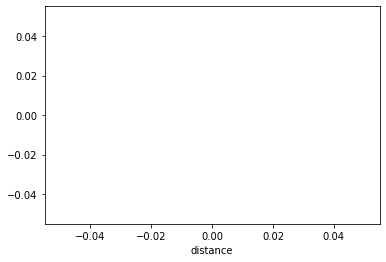

In [89]:
sns.scatterplot(new_df.describe()['distance'])

In [79]:
new_df.to_excel('nearest_atm1.xlsx')

In [ ]:
#Id1 | address1 | gov1 | section1 | lat1 | long1 | ---- | Id2 | address | gov | section | lat | long  | Id2 | address | gov | section | lat | long | Id2 | address | gov | section | lat | long